In [1]:
'''
Import packages
'''
import numpy as np
import os 

import glob
from matplotlib.colors import LinearSegmentedColormap
import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.ticker as ticker
from matplotlib.ticker import LogFormatterExponent
# import matplotlib.patches as mpatches
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import pandas as pd

from scipy import stats, optimize
from scipy.stats import lognorm
import scipy
from PIL import Image
import math

from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d
from scipy.special import expit as logistic
from colorcet import fire
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from itertools import chain
import matplotlib.patheffects as pe

print("All packages imported")

All packages imported


In [2]:
from matplotlib import rcParams, patheffects
plt.rcParams["font.family"] = 'serif'
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Computer Modern Sans serif']
plt.rcParams["font.family"] = 'serif'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Palatino']
params = {'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amssymb}']}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
'''
Function converts mm input to inches (for plotting figures the correct size).
'''

def mm2inch(*tupl):
    if isinstance(tupl[0], tuple):
        return tuple(k*0.0393701 for k in tupl[0])
    else:
        return tuple(k*0.0393701 for k in tupl)

In [4]:
def string_check(path, string):
    for file in os.listdir(path):
        rel = path + "/" + file
        if string in rel and "DTA" not in rel and "AE" not in rel:
            print(rel)
#             path.append(rel)
#             print(type(rel))
#             try: 
#                 len(rel)
            return rel
#             except:
#                 continue

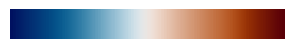

In [5]:
cm_data = np.loadtxt("ScientificColourMaps6/vik/vik.txt")
vik_map = LinearSegmentedColormap.from_list("vik", cm_data)
vik_map_r = LinearSegmentedColormap.from_list("vik", cm_data[::-1])
x = np.linspace(0, 100, 100)[None, :]
fig = plt.figure(1, mm2inch(90,10), dpi=100)
plt.imshow(x, aspect="auto",cmap=vik_map)
plt.axis("off")
plt.show()

In [6]:
'''Segment the "vik" colourmap'''

cmaplist = [vik_map_r(i) for i in range(vik_map_r.N)]
seg_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, vik_map_r.N)

# define the bins and normalise
bounds = np.linspace(-18, 18, 13)
norm = mpl.colors.BoundaryNorm(bounds, vik_map_r.N)

In [7]:
buffer = [pe.withStroke(linewidth=1.5, foreground="w")]

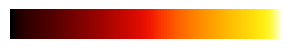

In [8]:
# cm_data = np.loadtxt("ScientificColourMaps6/vik/vik.txt")
fire_map = LinearSegmentedColormap.from_list("fire", fire)
fire_map_r = LinearSegmentedColormap.from_list("fire_r", fire[::-1])

# fire_map_r = LinearSegmentedColormap.from_list("vik", cm_data[::-1])
x = np.linspace(0, 100, 100)[None, :]
fig = plt.figure(1, mm2inch(90,10), dpi=100)
plt.imshow(x, aspect="auto",cmap=fire_map)
plt.axis("off")
plt.show()

In [9]:
pla = pylab.cm.plasma
inferno = pylab.cm.inferno
magma = pylab.cm.magma
def x2clr(x, total):
        return int(x/total*256-1)

In [10]:
ls Deformation

A5/                  KA/                  R10_orig/
B5/                  LLA/                 Volvic/
C8/                  LLB/                 _R10/
CC/                  MP/                  trx_10_R10_13_w.txt
C_star_prime/        MSH/
EB/                  R10/


In [11]:
R10_samples = glob.glob("Deformation/R10/*")
R10_samples.remove('Deformation/R10/Unloads')
# R10_samples=R10_samples.sort(key = lambda x: int(x.split('-')[1]))
R10_samples

['Deformation/R10/R10-5',
 'Deformation/R10/R10-3',
 'Deformation/R10/R10-4',
 'Deformation/R10/R10-13',
 'Deformation/R10/R10-15',
 'Deformation/R10/R10-12',
 'Deformation/R10/R10-6',
 'Deformation/R10/R10-8',
 'Deformation/R10/R10-9',
 'Deformation/R10/R10-7',
 'Deformation/R10/R10-17',
 'Deformation/R10/R10-10',
 'Deformation/R10/R10-11',
 'Deformation/R10/R10-16']

In [12]:
R10_paths = []
for s in R10_samples:
    try:
        path = string_check(s,"trx")
        if not path == None:
            R10_paths.append(path)
    except:
        continue
#     print(s)
R10_unload_paths = []
for s in R10_samples:
    try:
        path = string_check(s,"unload")
        if not path == None:
            R10_unload_paths.append(path)
    except:
        continue   

Deformation/R10/R10-5/trx_50_R10_5_w.txt
Deformation/R10/R10-3/trx_10_R10_3_w.txt
Deformation/R10/R10-4/trx_50_R10_4_w.txt
Deformation/R10/R10-13/trx_10_R10_13_w.txt
Deformation/R10/R10-15/trx_30_R10_15_w.txt
Deformation/R10/R10-12/trx_50_R10_12_w.txt
Deformation/R10/R10-6/trx_50_R10_6_w.txt
Deformation/R10/R10-8/trx_50_R10_8_w.txt
Deformation/R10/R10-9/trx_50_R10_9_w.txt
Deformation/R10/R10-7/trx_10_R10_7_w.txt
Deformation/R10/R10-17/trx_70_R10_17_w.txt
Deformation/R10/R10-10/trx_10_R10_10_w.txt
Deformation/R10/R10-11/trx_10_R10_11_w.txt
Deformation/R10/R10-16/trx_70_R10_16_w.txt
Deformation/R10/R10-5/unload_50_R10_5_w.txt
Deformation/R10/R10-3/unload_10_R10_3_w.txt
Deformation/R10/R10-4/unload_50_R10_4_w.txt
Deformation/R10/R10-13/unload_10_R10_13_w.txt
Deformation/R10/R10-15/unload_30_R10_15_w.txt
Deformation/R10/R10-12/unload_50_R10_12_w.txt
Deformation/R10/R10-6/unload2_50_R10_6_w.txt
Deformation/R10/R10-8/unload_50_R10_8_w.txt
Deformation/R10/R10-9/unload_50_R10_9_w.txt
Deformati

In [13]:
samples = []
data_dict = {}
for path in R10_paths:
    sample = path[path.find("R10/")+4:path.find("/trx")]
    samples.append(sample)
    print(sample)
    p_eff = path[path.find("trx_")+4:path.find("trx_")+6]
    data = pd.read_csv(path,
                     sep="\t",
                     encoding = 'unicode_escape')
    data_dict["{}".format(sample)] = (data, p_eff)
# samples = []
for path in R10_unload_paths:
    sample = path[path.find("R10/")+4:path.find("/unload")]
    samples.append(sample)
    p_eff = path[path.find("unload_")+4:path.find("unload_")+6]
    print(sample)
    data = pd.read_csv(path,
                     sep="\t",
                     encoding = 'unicode_escape')
    data_dict["{}-un".format(sample)] = (data, p_eff)

R10-5
R10-3
R10-4
R10-13
R10-15
R10-12
R10-6
R10-8
R10-9
R10-7
R10-17
R10-10
R10-11
R10-16
R10-5
R10-3
R10-4
R10-13
R10-15
R10-12
R10-6
R10-8
R10-9
R10-7
R10-17
R10-10
R10-11
R10-16


In [14]:
for sample in [x for x in list(data_dict) if not "un" in x]:
    df = data_dict[sample][0]
    try:
        df["Pm"] = (df['Pax(MPa)']+(2*df['Pc(MPa)']))/3-df['Ppam(MPa)']
    except:
        print("issue with ", sample)

In [15]:
def plot_sign_line(sample, axis, smoothing = 53):
        ax = axis
        
        Xdata  = data_dict[sample][0]["Defvolfluide"]#[0:n]
        Xsmooth = gaussian_filter1d(Xdata, smoothing, mode="nearest")
        Xdiff = np.diff(Xsmooth)
        signs =[np.sign(x) for x in -Xdiff]
        
        
        ax.plot(data_dict[sample][0]["Defaxcapt"][1::],signs, 
                color = "k", 
#                 color = "k", 
                lw=1.5)
        
        ax.plot(data_dict[sample][0]["Defaxcapt"][1::],signs, 
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)), 
#                 color = "k", 
                lw=1)
        
        
        ax.set_ylim(-1.3,1.1)
        ax.spines["left"].set_bounds(-1,1)
#         ax.set_xlim(-0.005,0.121)
#         ax.spines["bottom"].set_bounds(0, 0.121)
#         ax.set_yticklabels(["Compaction", "Dilation"], fontsize= "small")
        ax.set_yticklabels(["$-$", "$+$"], fontsize= "small")
        ax.set_yticks([-1,1])
        for sp in ["top", "right"]:
            ax.spines[sp].set_visible(False)
        threshold = 0
    # ax.axhline(threshold, color='green', lw=2, alpha=0.7)
        ax.fill_between(data_dict[sample][0]["Defaxcapt"][0::], -1.1, 1.1, where=Xdata >= threshold,
                                     facecolor="none",
                        color='lightgrey',hatch="XX", lw=0,alpha=0.5,label = "net compaction")# transform=ax.get_xaxis_transform())


In [16]:
def plot_sign_line_offset(sample, axis, smoothing = 53, offset=0, label='_nolegend_'):
        ax = axis
        
        Xdata  = data_dict[sample][0]["Defvolfluide"][0:n]
        Xsmooth = gaussian_filter1d(Xdata, smoothing, mode="nearest")
        Xdiff = np.diff(Xsmooth)
        signs =[np.sign(x) for x in -Xdiff]
        
        
        ax.plot(data_dict[sample][0]["Defaxcapt"][1:n],[x+offset for x in signs], 
                color = "k", 
#                 color = "k", 
                lw=1.5)
        
        ax.plot(data_dict[sample][0]["Defaxcapt"][1:n],[x+offset for x in signs], 
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)), 
#                 color = "k", 
                lw=1)
        
        
#         ax.set_ylim(-1.3,1.1)
#         ax.spines["left"].set_bounds(-1,1)
# #         ax.set_xlim(-0.005,0.121)
# #         ax.spines["bottom"].set_bounds(0, 0.121)
# #         ax.set_yticklabels(["Compaction", "Dilation"], fontsize= "small")
#         ax.set_yticklabels(["$-$", "$+$"], fontsize= "small")
#         ax.set_yticks([-1,1])
#         for sp in ["top", "right"]:
#             ax.spines[sp].set_visible(False)
#         threshold = 0
    # ax.axhline(threshold, color='green', lw=2, alpha=0.7)

# acecolor="none", hatch="X"
        ax.fill_between(data_dict[sample][0]["Defaxcapt"][0:n], -1.1+offset, 1.1+offset, where=Xdata >= threshold,
                    facecolor="none",
                        color='lightgrey',hatch="XX", lw=0,alpha=0.5,label = label)# transform=ax.get_xaxis_transform())


In [17]:
def normalize(values, actual_bounds, desired_bounds):
    return [desired_bounds[0] + (x - actual_bounds[0]) * (desired_bounds[1] - desired_bounds[0]) / (actual_bounds[1] - actual_bounds[0]) for x in values]


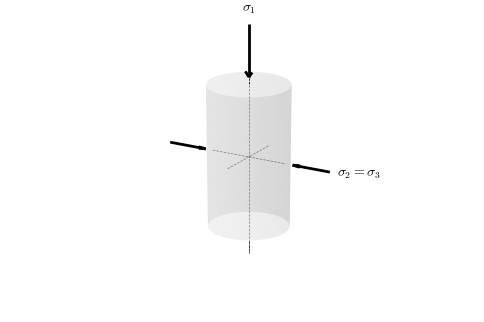

In [18]:
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,0.01,0.1)
ax.plot_surface(Xc, Yc, Zc, alpha=.1, color="grey", zorder = 0)
ax.set_ylim(0.17, 0.23)
ax.set_xlim(0.17, 0.23)
ax.set_zlim(0,0.1)
# ax.annotate(r"$\sigma_1$", )

ax.quiver(
        0.2,0.2,0.14, # <-- starting point of vector
        0, 0, -0.035, # <-- directions of vector
    arrow_length_ratio=0.1,
        color = 'k', alpha = 1, lw = 2,
    )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.quiver(
        0.178,0.2,0.05, # <-- starting point of vector
        0.01, 0, 0, # <-- directions of vector
    arrow_length_ratio=0.2,
        color = 'k', alpha = 1, lw = 2,
    )
ax.quiver(
        0.222,0.2,0.05, # <-- starting point of vector
        -0.01, 0, 0, # <-- directions of vector
    arrow_length_ratio=0.2,
        color = 'k', alpha = 1, lw = 2,zorder = np.inf
    )
ax.plot([0.19,0.21],[0.2, 0.2],[0.05,0.05], lw=0.5, ls="--", color = "k", alpha = 0.5)
ax.plot([0.2,0.2],[0.19, 0.21],[0.05,0.05], lw=0.5, ls="--", color = "k", alpha = 0.5)
ax.plot([0.2,0.2],[0.2, 0.2],[-0.02,0.12], lw=0.5, ls="--", color = "k", alpha = 0.5)
ax.plot([0.2,0.2],[0.2, 0.2],[0.1,0.12], lw=0.5, ls="--", color = "k", alpha = 1)
ax.plot([0.2,0.2],[0.2, 0.2],[-0.011,-0.02], lw=0.5, ls="--", color = "k", alpha = 1)
ax.text(0.2, 0.2, 0.15, r"$\sigma_1$", va="center", ha="center", )#fontsize = "large")
ax.text(0.224, 0.2, 0.05, r"$\sigma_2 = \sigma_3$", va="center", ha="left", )#fontsize = "large")

ax.axis("off")

# floor = Circle((x_center, y_center), radius, color=color)
# ax.add_patch(floor)
# art3d.pathpatch_2d_to_3d(floor, z=elevation, zdir="z")

# ceiling = Circle((x_center, y_center), radius, color=color)
# ax.add_patch(ceiling)
# art3d.pathpatch_2d_to_3d(ceiling, z=elevation+height, zdir="z")

plt.show()

def inset_cylinder(ax):
    Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,0.01,0.1)
    ax.plot_surface(Xc, Yc, Zc, alpha=.1, color="grey", zorder = 0)
    ax.set_ylim(0.17, 0.23)
    ax.set_xlim(0.17, 0.23)
    ax.set_zlim(0,0.1)
    # ax.annotate(r"$\sigma_1$", )

    ax.quiver(
            0.2,0.2,0.14, # <-- starting point of vector
            0, 0, -0.035, # <-- directions of vector
        arrow_length_ratio=0.1,
            color = 'k', alpha = 1, lw = .5,
        )

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.quiver(
            0.178,0.2,0.05, # <-- starting point of vector
            0.01, 0, 0, # <-- directions of vector
        arrow_length_ratio=0.2,
            color = 'k', alpha = 1, lw = .5,
        )
    ax.quiver(
            0.222,0.2,0.05, # <-- starting point of vector
            -0.01, 0, 0, # <-- directions of vector
        arrow_length_ratio=0.2,
            color = 'k', alpha = 1, lw = .5,zorder = np.inf
        )
    ax.plot([0.19,0.21],[0.2, 0.2],[0.05,0.05], lw=0.5, ls="--", color = "k", alpha = 0.5)
    ax.plot([0.2,0.2],[0.19, 0.21],[0.05,0.05], lw=0.5, ls="--", color = "k", alpha = 0.5)
    ax.plot([0.2,0.2],[0.2, 0.2],[-0.02,0.12], lw=0.5, ls="--", color = "k", alpha = 0.5)
    ax.plot([0.2,0.2],[0.2, 0.2],[0.1,0.12], lw=0.5, ls="--", color = "k", alpha = 1)
    ax.plot([0.2,0.2],[0.2, 0.2],[-0.011,-0.02], lw=0.5, ls="--", color = "k", alpha = 1)
    ax.text(0.2, 0.2, 0.15, r"$\sigma_1$", va="center", ha="center",fontsize = 5 )#fontsize = "large")
#     ax.text(0.224, 0.2, 0.05, r"$\sigma_2 = \sigma_3$", va="center", ha="left",fontsize=5 )#fontsize = "large")
    ax.text(0.22, 0.19, 0.08, r"$\sigma_2 = \sigma_3$", va="center", ha="left",fontsize=5 )#fontsize = "large")

    fig.patch.set_alpha(0)
    ax.axis("off")

In [19]:
def plot_microstructure(axis, filename, scale=1000, crop = [0,0,1500,1500]):
    image = Image.open(r"./Microstructure/{}.tif".format(filename))
    # Setting the points for cropped image
    left = crop[0]
    top = crop[1]
    right = crop[2]
    bottom = crop[3]
    cropped_image = image.crop((left, top, right, bottom))
    if scale == 100: ## scale in microns
        axis.plot([80,430],[1400, 1400], zorder = 10, color = "w")
    else:
        axis.plot([80,500],[1450, 1450], zorder = 10, color = "w")
    axis.imshow(cropped_image, cmap="cet_fire_r")

    axis.axis("off")

In [20]:
### Define a hypothetical hydrostat
x = np.arange(-4, 4.1, 0.1)
y = logistic(x)

In [21]:
threshold = 0

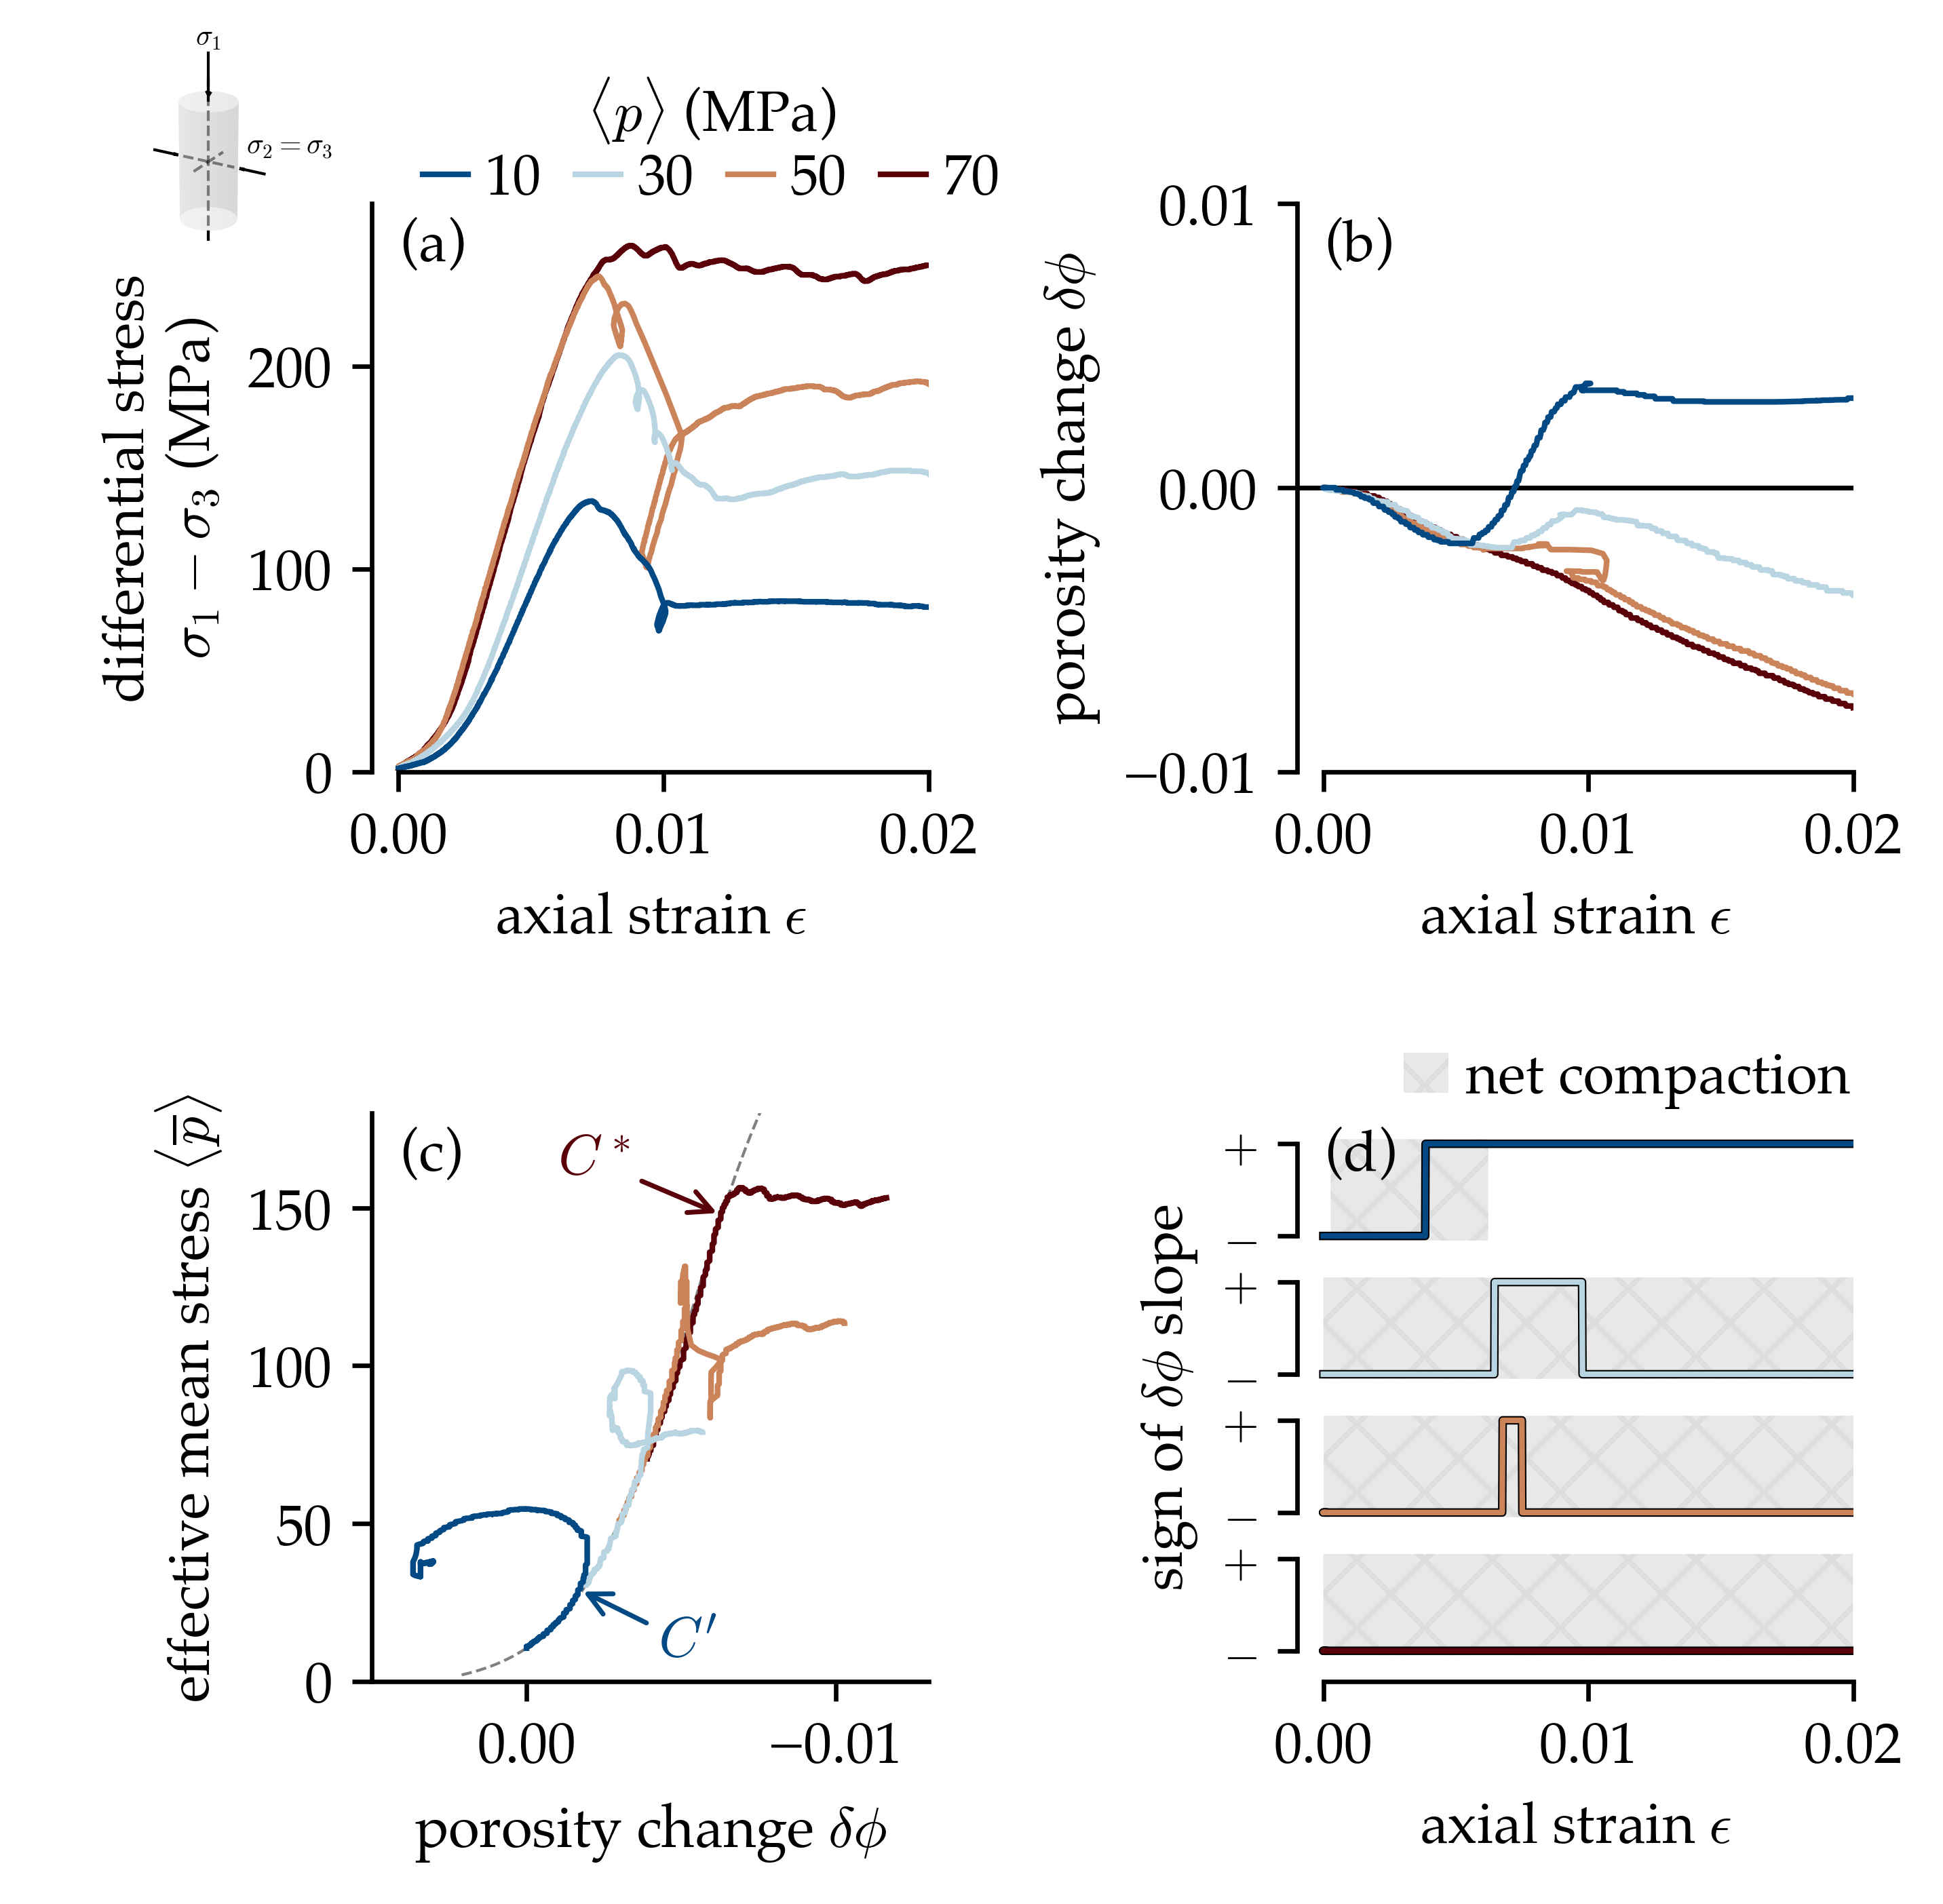

In [22]:
### RS FIG 1 v.1 ###

fig = plt.figure(1, figsize = (mm2inch(120, 120)), dpi = 600)

n = 1780  ## Don't plot the whole curve
x_offsets = [0, 0.0019, 0.003, 0.0039] ## Offset to align with (theoretical) hydrostat
alphas = [1,1,1,1]

axs = [fig.add_subplot(221),fig.add_subplot(222),fig.add_subplot(223),
       fig.add_subplot(224)]

y_offsets = [0,3,6,9]

for i, sample in enumerate(["R10-11","R10-15", "R10-8","R10-16"]): 
    
    df = data_dict[sample][0]


    axs[0].plot(df['Defaxcapt'][0:n],df["Q(MPa)"][0:n], 
             "-",ms=1,lw=1,mew=1,mfc="None",
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
                alpha = alphas[i], zorder = -i, label = data_dict[sample][1])
    
    axs[1].plot(df['Defaxcapt'][0:n],-1*df["Defvolfluide"][0:n], 
             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),             
             alpha = alphas[i], zorder = -i, label = data_dict[sample][1])
    
    axs[2].plot(-1*df['Defvolfluide'][0:n]-x_offsets[i],df["Pm"][0:n], 
             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
             alpha = alphas[i], zorder = -i, label = data_dict[sample][1])
    
    
    
   
#     plot_sign_line(sample, axis= [ax5a, ax5b, ax5c, ax5d][i])
for i, sample in enumerate(["R10-7","R10-15", "R10-8","R10-16"][::-1]): 
    label = "net compaction" if i == 0 else "_no_legend"
    plot_sign_line_offset(sample, axis=axs[3], smoothing = 53, offset=y_offsets[i], label=label)
    
axs[2].plot(normalize(x, (min(x), max(x)),(0.0021, -0.0127)),
     normalize(y, (min(y), max(y)),(2,230)), 
            zorder = -5, color="k", alpha = 0.5,lw=0.5, ls="--")

     ### Figure labels
for ix, ax in enumerate(axs):
    ax.annotate(["(a)", "(b)", "(c)", "(d)"][ix], xy=(0.05, 0.9), xycoords="axes fraction")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.patch.set_alpha(0)

    ### Axis limits

axs[0].set_ylim(0,280)
# axs[2].set_xlim(0,0.021)
axs[2].set_ylim(-.011,.011)
# # axs[2].set_xlim(-0.005,0.013)
axs[2].set_xlim(0.005,-0.013)
axs[2].set_ylim(0,180)
# axs[3].set_xlim(0,0.26)
# axs[3].set_ylim(-1.4, 2)
# for a in [ax5a, ax5b, ax5c, ax5d]:
#     a.set_xlim(-0.0005,0.021)
#     a.spines["bottom"].set_bounds(0,0.021)
#     if not a == ax5d:
#         a.set_xticks([])
for ii in [0,1,3]:
    axs[ii].set_xlim(-0.001,0.02)
    axs[ii].spines["bottom"].set_bounds(0,0.02)

    ### Ticks
axs[1].set_yticks([-.01,0,.01])
axs[2].set_xticks([0,-0.01])


#     ### guiding lines
axs[1].axhline(color="k", lw=.85, zorder = -5)
# axs[3].axhline(color="k", lw=.85, zorder = -5)

#     ### Axis labels
    
# axs[3].set_ylabel("incremental\n"+r"porosity change $\delta\phi\epsilon^{-1}_i$")
# axs[3].set_xlabel(r"initial porosity $\phi_0$")
axs[0].set_xlabel(r"axial strain $\epsilon$")#axial strain $\epsilon$")
axs[0].set_ylabel("differential stress\n"+r"$\sigma_1-\sigma_3$ (MPa)")
axs[2].set_ylabel(r"effective mean stress $\langle\overline{p}\rangle$")
axs[2].set_xlabel(r"porosity change $\delta\phi$")
axs[1].set_xlabel(r"axial strain $\epsilon$")#axial strain $\epsilon$")
axs[1].set_ylabel(r"porosity change $\delta\phi$")
# axs[3].set_ylabel("Inelastic compaction $\delta\phi{_i}\epsilon^{-1}_i$")
# axs[3].set_xlabel("Initial porosity $\phi_0$")
axs[3].set_xlabel(r"axial strain $\epsilon$")
axs[3].set_ylabel("sign of $\delta\phi$ slope")
# axs[5].set_ylabel("Inelastic compaction $\delta\phi{_i}\epsilon^{-1}_i$")
# axs[5].set_xlabel("Initial porosity $\phi_0$")


axs[3].spines["left"].set_bounds(-1,1,)
axs[3].set_yticks(list(chain(*[[o-1, o+1] for o in y_offsets])))
ax_0 = axs[3].twiny()
ax_0.spines["left"].set_bounds(2,4)
ax_1 = axs[3].twiny()
ax_1.spines["left"].set_bounds(5, 7)
ax_2 = axs[3].twiny()
ax_2.spines["left"].set_bounds(8,10)
for axis in [ax_0,ax_1, ax_2]:
    for spine in ["top", "bottom", "right"]:
        axis.spines[spine].set_visible(False)
    axis.set_xticks([])
axs[3].set_yticklabels(["$-$", "$+$","$-$", "$+$","$-$", "$+$","$-$", "$+$"], fontsize= "small")
    ### Add principle stress diagram
# ax_inset1=fig.add_axes([0.16,0.91,0.15,0.1], projection = "3d")
# ax_inset1=fig.add_axes([0.13,0.75,0.15,0.1], projection = "3d")
# ax_inset1=fig.add_axes([0.3,0.58,0.16,0.12], projection = "3d")
ax_inset1=fig.add_axes([0,0.85,0.17,0.13], projection = "3d")
inset_cylinder(ax = ax_inset1)
ax_inset1.patch.set_alpha(0.)
ax_inset1.xaxis.set_alpha(0.)
ax_inset1.yaxis.set_alpha(0.)
ax_inset1.zaxis.set_alpha(0.)
# ax_inset1

legend_kwargs = {"fancybox": False, "frameon": False,"ncol":4, "handletextpad":0.3,
                "handlelength":0.8, "columnspacing": 0.6, }#"fontsize":8}
axs[0].legend(**legend_kwargs, loc=3, bbox_to_anchor=(0., 0.9),#bbox_to_anchor=(0.4, 0.38),
              labelspacing=0.1, title = r"$\langle p\rangle$ (MPa)")

# axs[3].legend(**legend_kwargs, loc=2,bbox_to_anchor=(0.3, 1.2), markerscale = 0.8, labelspacing=0.2,fontsize=6)
# leg = axs[3].get_legend()
# for l in leg.legendHandles:
#     l.set_color("k")
    
axs[3].legend(**legend_kwargs, loc=2,bbox_to_anchor=(0.1, 1.2), markerscale = 0.8, labelspacing=0.2)


axs[2].annotate(r"$C^\prime$", xy = (-0.0015, 30), xycoords = "data", 
                  xytext=(15, -10), textcoords="offset points",
                va="center", color = vik_map(x2clr(10, 70)), 
                 arrowprops=dict(arrowstyle="->", shrinkA = 0,
                                 color = vik_map(x2clr(10, 70)),lw=0.85))


axs[2].annotate(r"$C^*$", xy = (-0.0065, 147), xycoords = "data", 
                  xytext=(-30, 10), textcoords="offset points",
                va="center", color = vik_map(x2clr(70, 70)), 
                 arrowprops=dict(arrowstyle="->",shrinkA=0,
                                 color = vik_map(x2clr(70, 70)),lw=0.85))



plt.tight_layout()

In [23]:
all_data = pd.read_csv("compiled-data.txt",
                     sep="\t",
                     encoding = 'unicode_escape')

In [24]:
volcanic_data = all_data.copy()

In [25]:
# # volcanic_data = all_data[~all_data["Sample"].str.contains("DDJ")]
# # volcanic_data = volcanic_data[~volcanic_data["Sample"].str.contains("BWS")]
# volcanic_data = all_data#.dropna()
# samples_to_exclude = ["EZ-9", "EZ-13", "KA-3", "KA-7", "KA-12"]
# volcanic_data = volcanic_data[~volcanic_data["Sample"].isin(samples_to_exclude)].reset_index()

In [26]:
cols = []

for i in volcanic_data["Peff"]:
    try:
        cols.append(vik_map(x2clr(i,70)))
    except:
        cols.append((0,0,0,0))
volcanic_data["Color"] = cols

markers = []
for i in volcanic_data["Sample"]:
    if "EB" in i:
        markers.append("s")
        #markers.append((6, 1, 60))
    elif "EZ" in i:
        markers.append("p")
    elif "KA" in i:
        markers.append("s")        
    elif "R10" in i:
        markers.append("o")
    elif "LLB" in i:
        markers.append("v")
    else:
        markers.append("^")
volcanic_data["Marker"] = markers

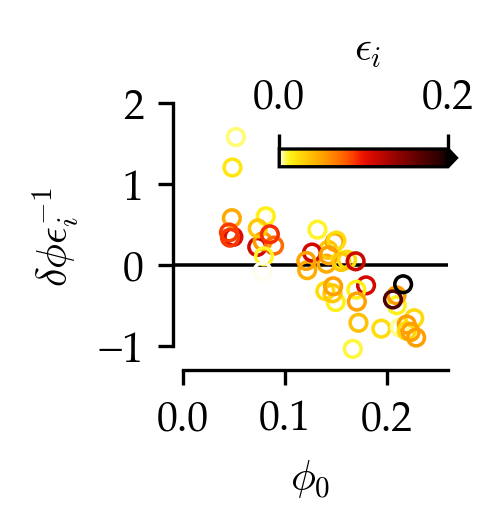

In [27]:
fig = plt.figure(1, figsize = (mm2inch(30,30)), dpi = 300)
ax1 = fig.add_subplot(111)
subset = volcanic_data#.sort_values("inelastic strain",ascending=True)

# for samples in ["EB", "EZ", "KA", "R10", "LLB", "C8"]:
#     subset = volcanic_data[volcanic_data["Sample"].str.contains(samples)]
# ax1.scatter(subset["_"],
#             subset["__i"]/subset["inelastic strain"]*-1, 
#        c = subset["inelastic strain"].values,
#             cmap="cet_fire_r", vmin=0, vmax=0.2,
#             ec="k",lw=0.1,
#        marker= "o", s=16,
#             label = samples, alpha = 1)

colors_E = [fire_map_r(x2clr(subset["inelastic strain"][i], 0.2)) for i in range(len(subset))]
# zorders = [volcanic_data["inelastic strain"][i] for i in range(len(volcanic_data))]

ax1.scatter(subset["_"],
            subset["__i"]/subset["inelastic strain"]*-1, 
       c = "None",#subset["inelastic strain"].values,
            cmap="cet_fire_r", vmin=0, vmax=0.2,
            ec=colors_E,lw=0.85,
       marker= "o", s=16,#zorder=zorders,
            label = samples, alpha = 1)
ax1.set_ylim(-1.3, 2)
ax1.set_yticks([-1,0,1,2])
ax1.set_xticks([0,0.1,0.2])
ax1.axhline(color="k", lw=.85, zorder = 0)

ax1.set_ylabel("$\delta\phi\epsilon^{-1}_i$")
ax1.set_xlabel(r"$\phi_0$")
ax1.spines["left"].set_bounds(-1, 2)
ax1.spines["bottom"].set_bounds(0, .26)
# plt.legend(fontsize="xx-small")
ax1.set_xlim(-.01,0.26)
cax = fig.add_axes([0.425, 0.7, 0.5, 0.05])
data = np.array(subset["inelastic strain"].values).reshape(1, -1)
im = ax.imshow(data, cmap='cet_fire_r', vmin=0, vmax=0.2)
fig.colorbar(im, cax=cax, orientation='horizontal',extend='max',label='$\epsilon_i$')
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
# leg = ax1.get_legend()
# for l in leg.legendHandles:
#     l.set_color("k")


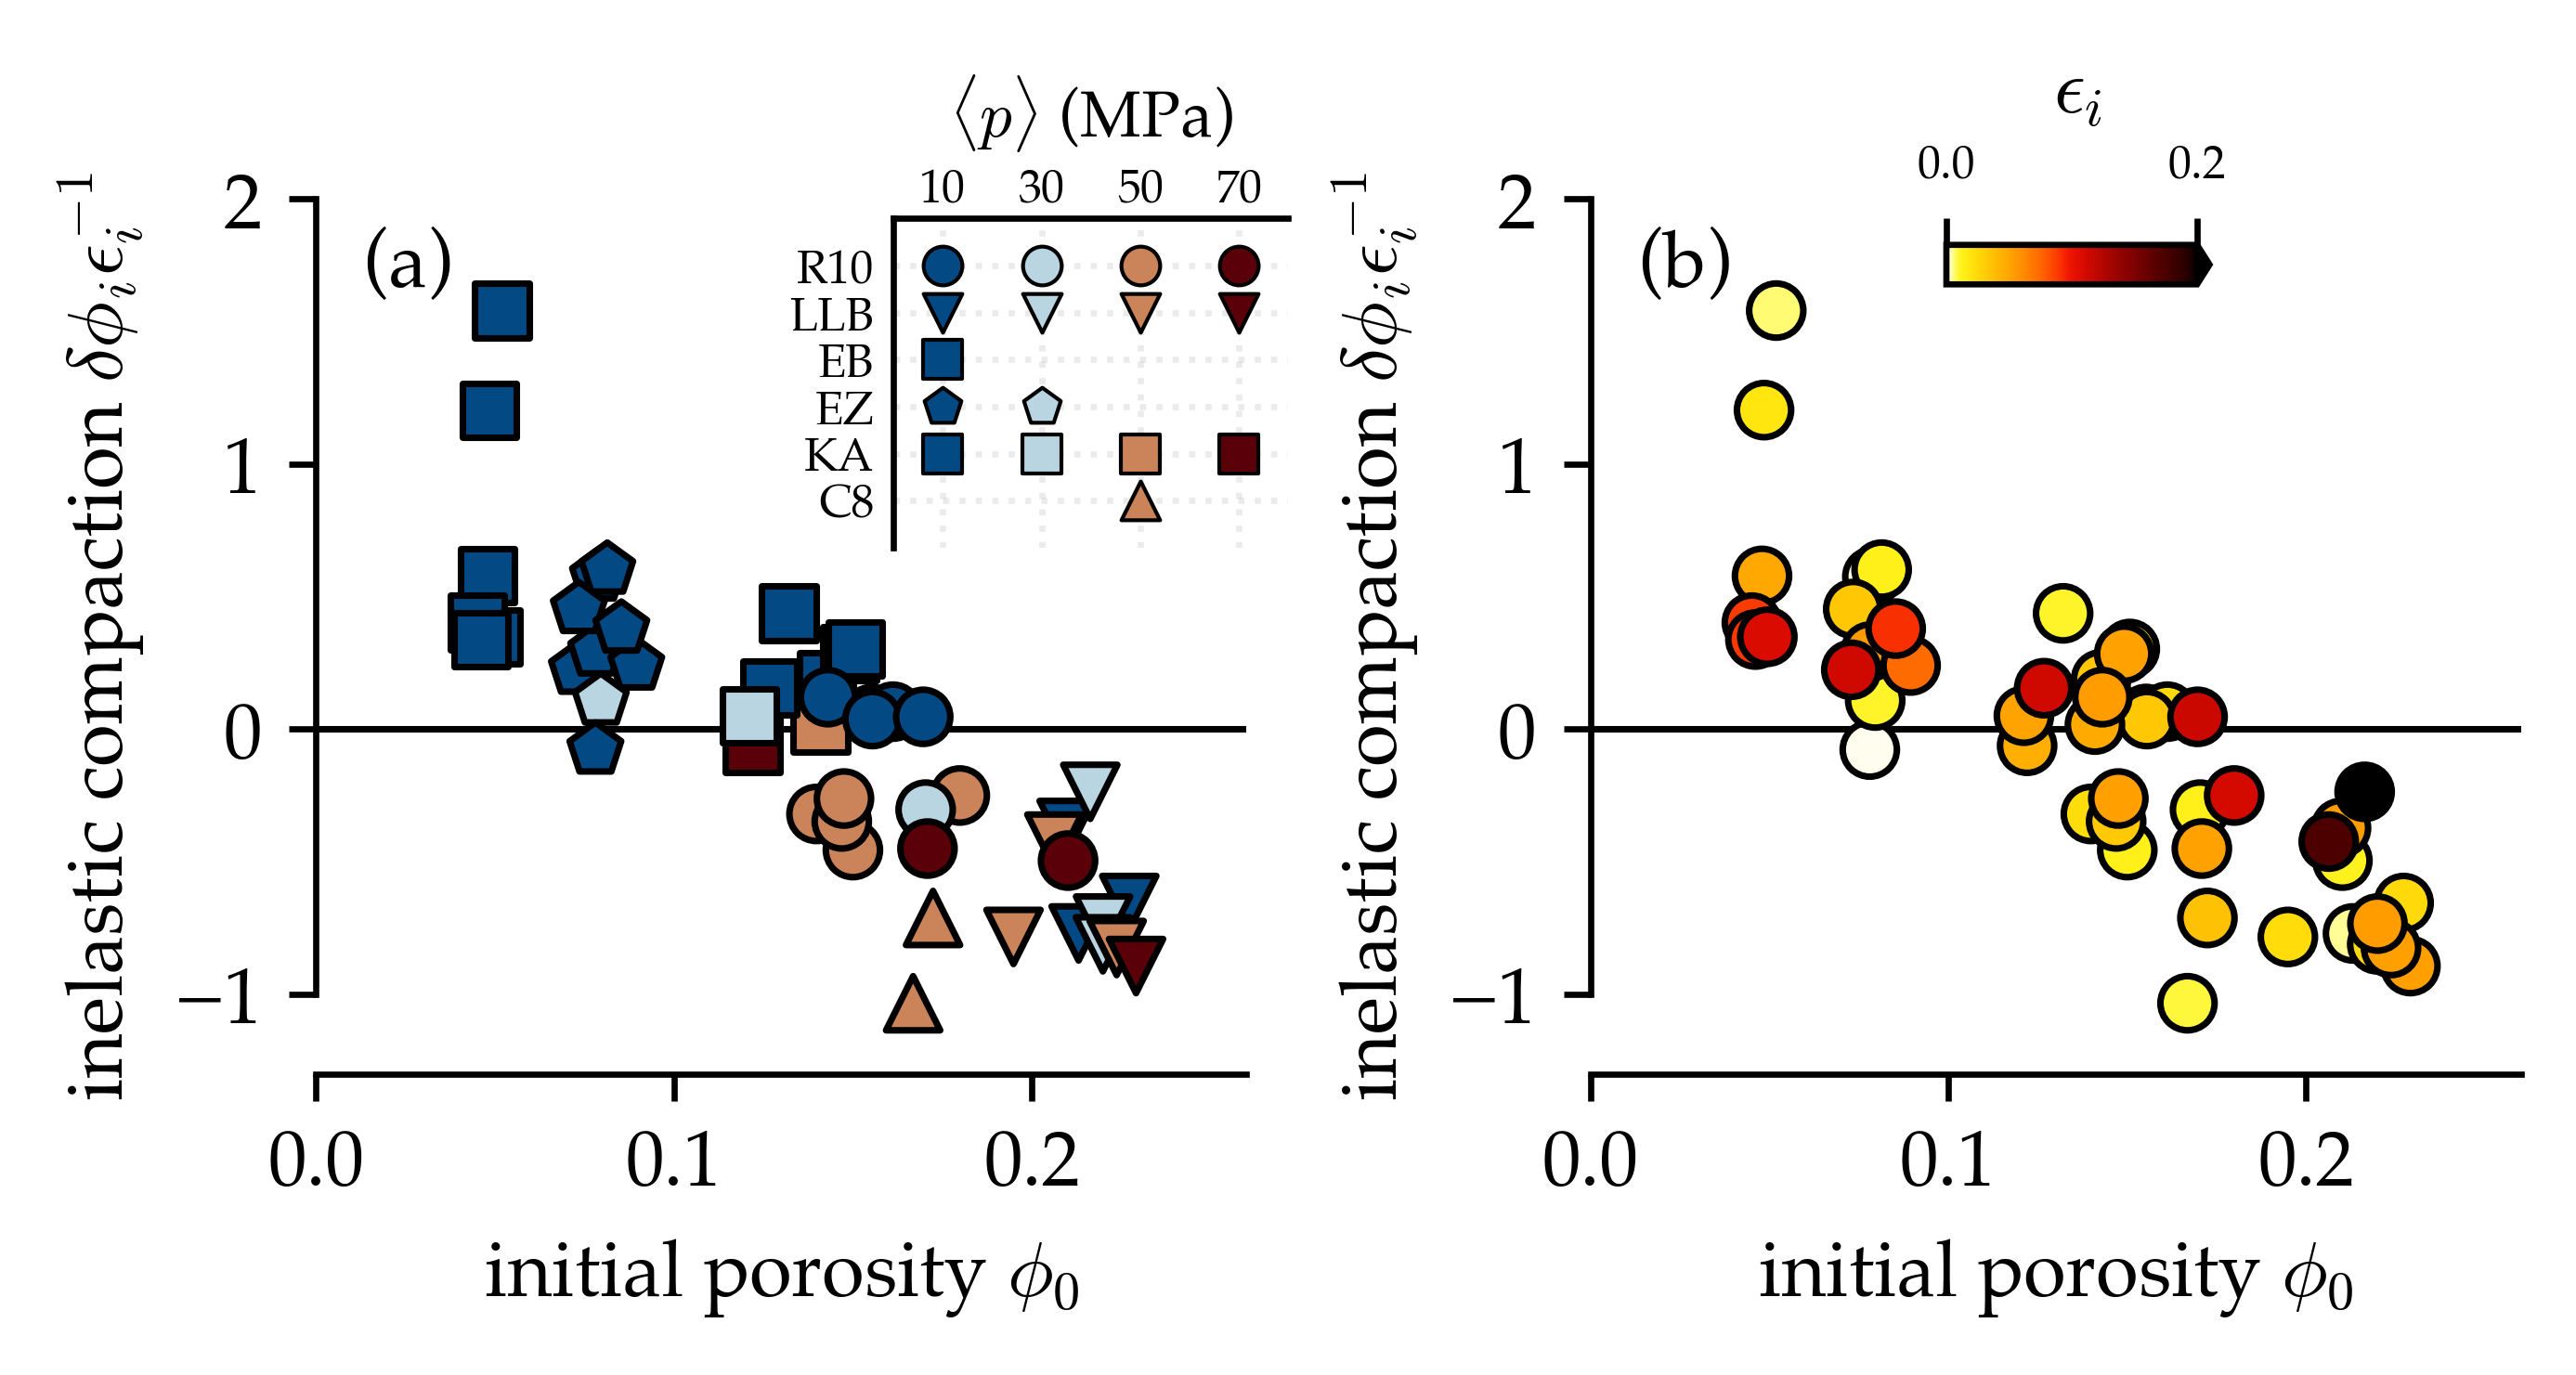

In [28]:
### RS FIG 2 v.1 ###

fig = plt.figure(1, figsize = (mm2inch(120,60)), dpi = 600)
axs = [fig.add_subplot(121),fig.add_subplot(122)]

for samples in ["EB", "EZ","KA", "LLB", "C8","R10"]:
        subset = volcanic_data[volcanic_data["Sample"].str.contains(samples)]
        axs[0].scatter(subset["_"],
            subset["__i"]/subset["inelastic strain"]*-1, 
            c = subset["Color"].values,ec="k",lw=.85,
           marker= subset["Marker"].values[0], s=49,
                label = samples)



subset = volcanic_data.sort_values("inelastic strain",ascending=True).reset_index()
data = np.array(subset["inelastic strain"].values).reshape(1, -1)
colors_E = [fire_map_r(x2clr(subset["inelastic strain"][j], 0.2)) for j in range(len(subset))]

# zorders = [volcanic_data["inelastic strain"][i] for i in range(len(volcanic_data))]

axs[1].scatter(subset["_"],
            subset["__i"]/subset["inelastic strain"]*-1, 
       c = colors_E,#subset["inelastic strain"].values,
            cmap="cet_fire_r", vmin=0, vmax=0.2,
            ec="k",lw=0.85,
       marker= "o", s=49,#zorder=zorders,
            label = samples, alpha = 1)
for ix, axis in enumerate([axs[0],axs[1]]):
    axis.set_ylim(-1.3, 2)
    axis.set_xlim(0,0.26)
    axis.set_yticks([-1,0,1,2])
    axis.set_xticks([0,0.1,0.2])
    axis.axhline(color="k", lw=.85, zorder = 0)
    axis.set_ylabel("inelastic compaction $\delta\phi{_i}\epsilon^{-1}_i$")
    axis.set_xlabel("initial porosity $\phi_0$")
    axis.spines["left"].set_bounds(-1, 2)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.annotate(["(a)", "(b)"][ix], xy=(0.05, 0.9), xycoords="axes fraction")
    

# lax = fig.add_axes([.35,0.6, 0.1, 0.3])
lax = fig.add_axes([.35,0.65, 0.15, 0.25])
lax.grid(True, ls=":", alpha = .25)
for i, samples in enumerate(["R10", "LLB", "EB", "EZ","KA","C8"]):
        subset = volcanic_data[volcanic_data["Sample"].str.contains(samples)]
        for p in list(set(subset["Peff"])):
            lax.scatter(p,-i, marker= subset["Marker"].values[0], s=25,
                      color = vik_map(x2clr(p, 70)),ec="k",lw=.5, zorder = np.inf)

lax.set_yticks([0,-1,-2,-3,-4,-5])
lax.set_yticklabels(["R10", "LLB", "EB", "EZ","KA","C8"])
lax.set_ylim(-6,1)
lax.set_xlim(0,80)
lax.set_xticks([10,30,50,70])
lax.set_xlabel(r"$\langle p\rangle$ (MPa)", fontsize = "small")    
lax.xaxis.set_label_position('top') 
lax.xaxis.tick_top()
for sp in ["right", "bottom"]:
    lax.spines[sp].set_visible(False)
lax.tick_params(left = False, top=False) 
lax.tick_params(axis='y', which='major', labelsize=6, pad=-1)
lax.tick_params(axis='x', which='major', labelsize=6, pad=-3)

# axs[0].legend(**legend_kwargs, loc=2,bbox_to_anchor=(0.6, 0.95), markerscale = 0.8, labelspacing=1,fontsize=8)
# leg = axs[0].get_legend()
# for l in leg.legendHandles:
#     l.set_color("k")
    

# im = ax.imshow(data, cmap='cet_fire_r', vmin=0, vmax=0.2)
cax = fig.add_axes([0.75,0.85, 0.1, 0.03])
fig.colorbar(im, cax=cax, orientation='horizontal',extend='max',label='$\epsilon_i$')
cax.set_xlabel('$\epsilon_i$')#, labelpad=-5)
cax.xaxis.set_label_position('top') 
cax.xaxis.set_ticks_position('top') 
cax.tick_params(axis='x', which='major', labelsize=6,)# pad=-3)

plt.tight_layout()

In [29]:
c8_8 = pd.read_csv("Deformation/C8/trx50_c8_8w.txt",
                     sep="\t",
                     encoding = 'unicode_escape')
data_dict["C8-8"] = (c8_8, 50)
df = data_dict["C8-8"][0]
df["Pm"] = (df['Pax(MPa)']+(2*df['Pc(MPa)']))/3-df['Ppam(MPa)']


llb_13 = pd.read_csv("Deformation/LLB/trx_30_LLB_13_w.txt",
                     sep="\t",
                     encoding = 'unicode_escape')



llb_2 = pd.read_csv("Deformation/LLB/trx_30_LLB_2_w.txt",
                     sep="\t",
                     encoding = 'unicode_escape')

data_dict["LLB-2"] = (llb_2, 30)
df = data_dict["LLB-2"][0]
df["Pm"] = (df['Pax(MPa)']+(2*df['Pc(MPa)']))/3-df['Ppam(MPa)']

In [30]:
old_strain = list(data_dict["C8-8"][0]["Defaxcapt"].values)
old_strain_llb2 = list(data_dict["LLB-2"][0]["Defaxcapt"].values)

In [31]:
max_ix = old_strain.index(max(data_dict["C8-8"][0]["Defaxcapt"]))
max1 = old_strain[max_ix]

max_ix_llb2 = old_strain_llb2.index(max(data_dict["LLB-2"][0]["Defaxcapt"]))
max1_llb2 = old_strain_llb2[max_ix_llb2]

In [32]:
new_strain1 = old_strain[0:max_ix]+\
                        6*[np.nan]+\
                        [x+max1+0.0085 for x in old_strain[max_ix+6::]]

new_strain1_llb2 = old_strain_llb2[0:max_ix_llb2]+\
                        15*[np.nan]+\
                        [x+max1_llb2+0.0145 for x in old_strain_llb2[max_ix_llb2+15::]]

In [33]:
max_ix2 = new_strain1.index(max(new_strain1[5000:6500]))
max2 = new_strain1[max_ix2]
max_ix2_llb2 = new_strain1_llb2.index(max(new_strain1_llb2[12000:13000]))
max2_llb2 = new_strain1_llb2[max_ix2_llb2]

In [34]:
new_strain2 = new_strain1[0:max_ix2]+\
                        20*[np.nan]+\
                        [x+0.066 for x in new_strain1[max_ix2+20::]]

new_strain2_llb2 = new_strain1_llb2[0:max_ix2_llb2]+\
                        20*[np.nan]+\
                        [x+0.0725 for x in new_strain1_llb2[max_ix2_llb2+20::]]

No handles with labels found to put in legend.


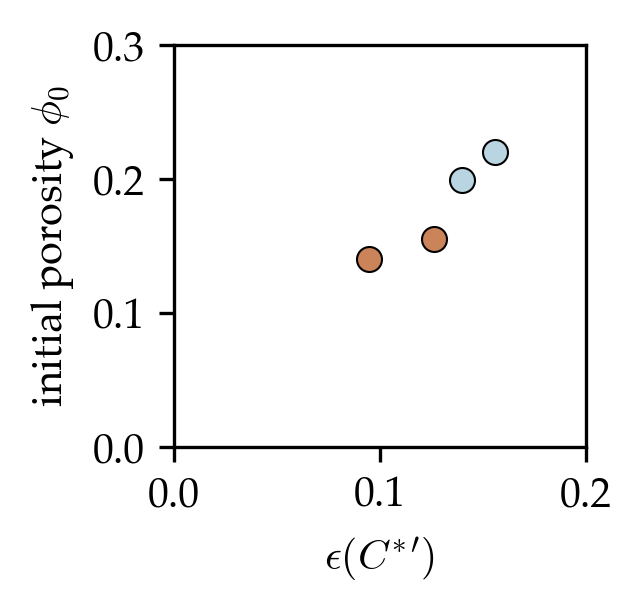

In [35]:
fig = plt.figure(1, figsize = (mm2inch(45,45)), dpi =300)
ax1 = fig.add_subplot(111)

colors = [vik_map(x2clr(i,70)) for i in [30,50,30,50]]

xdata = [new_strain2_llb2,
    data_dict["R10-12"][0]["Defaxcapt"][0:-500],
         llb_13["Defaxcapt"],
         new_strain2[0:-500]
]

phi_i = [.199043260580447, 0.14, 0.22, 0.155]

xs = []
ys = []
for i, ydata in enumerate([
    data_dict["LLB-2"][0]["Defvolfluide"],
    data_dict["R10-12"][0]["Defvolfluide"][0:-500],
    llb_13["Defvolfluide"],
    data_dict["C8-8"][0]["Defvolfluide"][0:-500]
            ]):

    data = ydata

    smooth = gaussian_filter1d(data, 100, mode="nearest")
    # smoothx = gaussian_filter1d(data_dict["LLB-2"][0]["Defaxcapt"], 10)
    diff1 = np.diff(smooth, axis=0)
    diff2 = np.diff(diff1, axis=0)
#     plt.plot(diff1)
    zeropoint = min(enumerate(diff1), key=lambda x: abs(x[1]-0))
#     plt.plot(xdata[i], phi_i[i]-ydata)
    plt.scatter(xdata[i][zeropoint[0]],phi_i[i], edgecolor="k", linewidth=0.5, color=colors[i])
    if not i == 3:
        xs.append(xdata[i][zeropoint[0]])
        ys.append(phi_i[i])
#     ax1.plot(diff2)
# plt.axvline(12099, color="k")
    # plt.ylim(-0.00000001,0.00000001)
#     plt.yscale("log")
#     plt.ylim(-1.00000000001,1.00000000001)
# ax2 = ax1.twinx()
# ax2.plot(ydata)
# ax2.plot(smooth)
# ax1.axhline(0, color="k", zorder = 0, alpha = 0.5)
# plt.axvline(zeropoint[0])
# print(zeropoint)
ax1.set_ylabel(r"initial porosity $\phi_0$")
# ax1.set_xlabel(r"axial strain $\epsilon$ at $C^{*}'$")
# ax1.set_xlabel(r"$\epsilon_{C^{*}'}$")
ax1.set_xlabel(r"$\epsilon(C^{*}')$")
# plt.ylim(0,0.3) 
plt.legend(fancybox = False, frameon = False, 
          bbox_to_anchor=(.22,.7), fontsize = "x-small")

# plt.ylim(0.06,0)
plt.ylim(0,.3)
plt.xlim(0,0.2)


b, a = np.polyfit(xs, ys, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0.05, 0.2, num=10)

# Plot regression line
# ax1.plot(xseq, a + b * xseq, color=colors[0], lw=1, zorder=0);

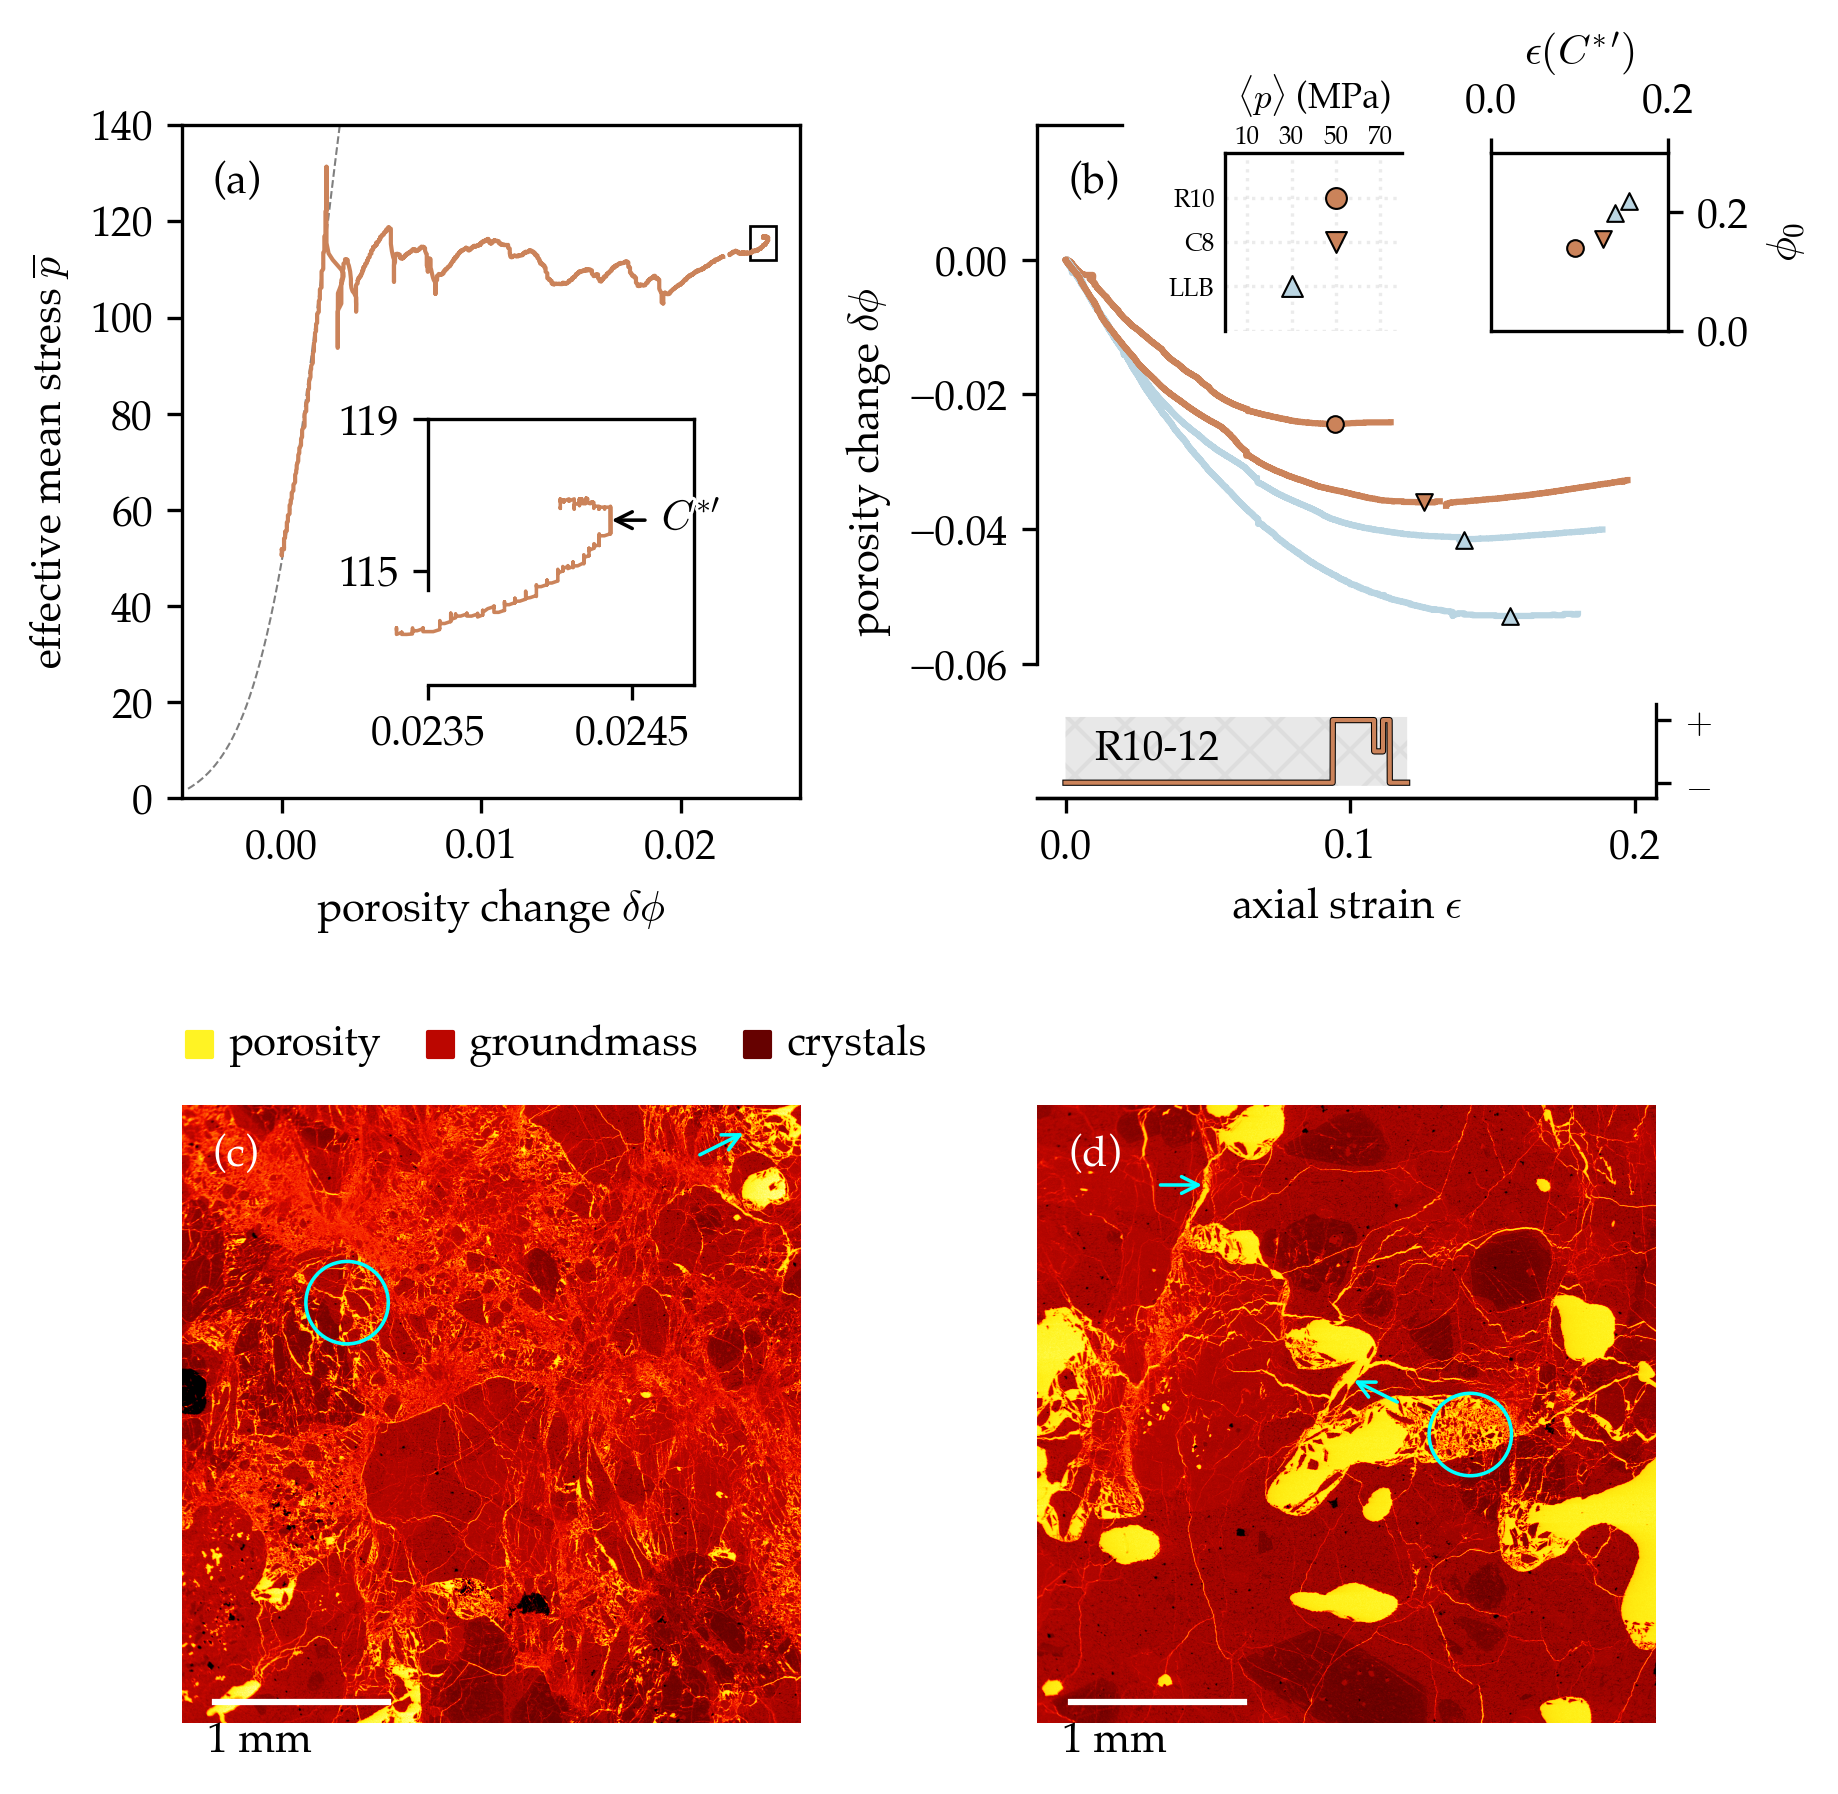

In [36]:
### RS Fig 3 ###
fig = plt.figure(1, figsize = (mm2inch(150,150)), dpi = 300)
### Define a hypothetical hydrostat
x = np.arange(-4, 4.1, 0.1)
y = logistic(x)

phi_i = [.199043260580447, 0.14, 0.22, 0.155]
axs = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224),
       #fig.add_subplot(245), fig.add_subplot(246), fig.add_subplot(247), fig.add_subplot(248),
      ]

colors = [vik_map(x2clr(10,70)), "grey"]

# plot_dphi_strain(ax=axs[0],sample = "R10-12")
sample = "R10-12"

df = data_dict[sample][0]
# axs[0].plot(df['Defvolfluide'][0:-1130],df["Pm"][0:-1130], 
m = 5608
m2 = 5658
m3 = 1130
axs[0].plot(df['Defvolfluide'][0:m],df["Pm"][0:m], 
             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
             alpha = 1.0, zorder = -i, label = data_dict[sample][1])
axs[0].plot(df['Defvolfluide'][m2:-m3],df["Pm"][m2:-m3], 
             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
             alpha = 1.0, zorder = -i, label = data_dict[sample][1])
axs[0].set_ylim(0,140)
axs[0].set_xlim(-0.005, 0.026)

ax_inset=fig.add_axes([0.25,0.65,0.15,0.15])
ax_inset.plot(df['Defvolfluide'][6400:-1130],df["Pm"][6400:-1130], 
             "-",ms=1,lw=.85,mew=.5,mfc="None", clip_on=False,
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
             alpha = 1.0, zorder = -i, label = data_dict[sample][1])
# ax_inset.set_xlim(0.024, 0.0245)
# ax_inset.set_ylim(113.5,117.5)
ax_inset.set_xlim(0.0235, 0.0235+0.0013)
ax_inset.set_ylim(112,112+7)
# ax_inset.set_yticks([114, 118])
ax_inset.set_yticks([115, 119])
ax_inset.set_xticks([0.0235, 0.0245])
ax_inset.annotate(r"$C^{*\prime}$", xy = (0.66, 0.62), xycoords = "axes fraction", 
                  xytext=(14, 0), textcoords="offset points",
                  path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
                 arrowprops=dict(arrowstyle="->", lw=0.85), va="center")
ax_inset.spines["left"].set_bounds(114.5,119)

axs[0].set_ylabel(r"effective mean stress $\overline{p}$")
axs[0].set_xlabel(r"porosity change $\delta\phi$")


# rect = patches.Rectangle((0.024, 113.5), 0.0005, 4, linewidth=0.5, edgecolor='None'
#                          , facecolor="grey", zorder = -5)
rect = patches.Rectangle((0.0235, 112), 0.0013, 7, linewidth=0.65, edgecolor='k'
                         , facecolor="none", zorder = -5)
axs[0].add_patch(rect)

axs[0].plot(normalize(x, (min(x), max(x)),(-0.0127+0.008, 0.0021+0.007)),
     normalize(y, (min(y), max(y)),(2,230)), 
            zorder = -5, color="k", alpha = 0.5,lw=0.5, ls="--")



#################

ax_3b = fig.add_axes([0.85,0.85,0.1,0.1])
# ax_3b = fig.add_axes([0.65,0.85,0.1,0.1])
xdata = [new_strain2_llb2,
    data_dict["R10-12"][0]["Defaxcapt"][0:-500],
         llb_13["Defaxcapt"],
         new_strain2[0:-500]
]
p_eff = [30,50,30,50]
symbol = ["^", "o", "^", "v"]
for i, ydata in enumerate([
    -data_dict["LLB-2"][0]["Defvolfluide"],
    -data_dict["R10-12"][0]["Defvolfluide"][0:-500],
    -llb_13["Defvolfluide"],
    -data_dict["C8-8"][0]["Defvolfluide"][0:-500]
            ]):

    data = ydata
    
    smooth = gaussian_filter1d(data, 100, mode="nearest")
    diff1 = np.gradient(smooth, axis=0)
    diff2 = np.gradient(diff1, axis=0)
    zeropoint = min(enumerate(diff1), key=lambda x: abs(x[1]-0))
    axs[1].plot(xdata[i], ydata, 
                color = vik_map(x2clr(int(p_eff[i]), 70))),
    axs[1].scatter(xdata[i][zeropoint[0]],ydata[zeropoint[0]], 
                   color = vik_map(x2clr(int(p_eff[i]), 70)),
                   marker=symbol[i],s=16, edgecolor = "k", linewidth = .5,
               zorder = 999)#, color = "yellow")
    ax_3b.scatter(xdata[i][zeropoint[0]],phi_i[i], edgecolor="k", linewidth=0.5,
                  marker=symbol[i],s=16, 
                  color = vik_map(x2clr(int(p_eff[i]), 70)),)
    if not i == 3:
        xs.append(xdata[i][zeropoint[0]])
        ys.append(phi_i[i])

axs[1].set_ylabel(r"porosity change $\delta\phi$")
axs[1].set_xlabel(r"axial strain $\epsilon$")

axs[1].set_ylim(-0.08, 0.02)
axs[1].spines["right"].set_visible(False)

ax_3a = axs[1].twinx()
plot_sign_line(sample="R10-12", axis=ax_3a, smoothing = 53)
ax_3a.set_ylim(-1.5, 20)
ax_3a.spines["right"].set_visible(True)
ax_3a.spines["left"].set_visible(False)
ax_3a.spines["right"].set_bounds(-1.5, 1.5)
# axs[1].annotate("R10-12", xy = (0.12, -0.026), xycoords = "data",
#           path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],)
# axs[1].annotate("C8-8", xy = (0.18, -0.035), xycoords = "data",
#            path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],)
# axs[1].annotate("LLB-13", xy = (0.18, -0.044), xycoords = "data",
#            path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],)
# axs[1].annotate("LLB-2", xy = (0.18, -0.055), xycoords = "data",
#            path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],)

ax_3a.annotate("R10-12", xy = (0.01, 0), xycoords = "data", va="center")


ax_3b.set_ylabel(r"$\phi_0$")
# ax1.set_xlabel(r"axial strain $\epsilon$ at $C^{*}'$")
# ax1.set_xlabel(r"$\epsilon_{C^{*}'}$")
ax_3b.set_xlabel(r"$\epsilon(C^{*}')$")
# plt.ylim(0,0.3) 
axs[1].set_yticks([-0.06,-0.04,-0.02,0])


# plt.ylim(0.06,0)
ax_3b.set_ylim(0,.3)
ax_3b.set_xlim(0,0.2)
ax_3b.xaxis.set_label_position('top')
ax_3b.xaxis.set_ticks_position('top')
# ax_3b.spines["bottom"].set_visible(False)
ax_3b.yaxis.set_label_position('right')
ax_3b.yaxis.set_ticks_position('right')
# ax_3b.spines["left"].set_visible(False)
# ax1.spines["right"].set_visible(False)
axs[1].spines["top"].set_bounds(-0.01,0.02)
axs[1].spines["left"].set_bounds(-0.06,0.02)

#########

legend_kwargs = {"fancybox": False, "frameon": False,"ncol":3, "handletextpad":0.3,
                "handlelength":0.8, "columnspacing": 1, }

axs[2].scatter([],[],marker="s", color = fire[240], label = "porosity")
axs[2].scatter([],[],marker="s", color = fire[100], label = "groundmass")
axs[2].scatter([],[],marker="s", color = fire[50], label = "crystals")
axs[2].legend(**legend_kwargs, loc = 3,bbox_to_anchor=(-0.06, 1))
# plt.savefig("GRL-Fig-2.svg", bbox_inches="tight")


plot_microstructure(axis=axs[2], filename="R10-12-06", scale=1000, crop = [0,0,1500,1500])
plot_microstructure(axis=axs[3], filename="R10-12-05", scale=1000, crop = [0,0,1500,1500])
axs[2].annotate(r"1 mm", xy = (0,0), xycoords = "axes fraction",
                xytext = (6,-7), textcoords = "offset points")
axs[3].annotate(r"1 mm", xy = (0,0), xycoords = "axes fraction",
                xytext = (6,-7), textcoords = "offset points")

for ix, ax in enumerate(axs):
    ax.annotate("({})".format(["a", "b", "c", "d"][ix]),
                color = ["k", "k", "w","w"][ix],
                xy=(0.05, 0.9), xycoords="axes fraction",) #path_effects=buffer)

# plot_microstructure(axis=axs[5], filename="R10-15-04", scale=1000, crop = [0,0,1500,1500])
# plot_microstructure(axis=axs[6], filename="R10-15-13", scale=100, crop = [0,0,1500,1500])


axs[2].annotate(r"", xy = (0.92, 0.96), xycoords = "axes fraction", 
                  xytext=(-14, -7), textcoords="offset points",
                  path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
                 arrowprops=dict(arrowstyle="->", lw=0.85, color="cyan"), va="center")

axs[3].annotate(r"", xy = (0.5, 0.56), xycoords = "axes fraction", 
                  xytext=(14, -7), textcoords="offset points",
                  path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
                 arrowprops=dict(arrowstyle="->", lw=0.85, color="cyan"), va="center")

axs[3].annotate(r"", xy = (0.28, 0.87), xycoords = "axes fraction", 
                  xytext=(-14, 0), textcoords="offset points",
                  path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
                 arrowprops=dict(arrowstyle="->", lw=0.85, color="cyan"), va="center")


circ = patches.Circle((400,480), 100, linewidth=0.85, edgecolor='cyan'
                         , facecolor="none", zorder = np.inf
                     )
axs[2].add_patch(circ)

circ2 = patches.Circle((1050,800), 100, linewidth=0.85, edgecolor='cyan'
                         , facecolor="none", zorder = np.inf
                     )
axs[3].add_patch(circ2)

# axs[1].annotate(r"$\phi_0$   $\langle p\rangle$", xy = (0.265,0.003),
#                 xycoords="data",va="center", ha="right", path_effects = buffer,  
#                )#color = vik_map(x2clr(50, 70)), )


# axs[1].hlines(y = 0, xmin = 0.175,xmax = 0.265, lw=0.75)
# axs[1].vlines(x = 0.225, ymin = -0.01, ymax = 0.01, lw=0.75)
# axs[1].spines["top"].set_visible(False)

# lax = fig.add_axes([.35,0.6, 0.1, 0.3])
lax = fig.add_axes([.7,0.85, 0.1, 0.1])

lax.grid(True, ls=":", alpha = .25)


# for i, samples in enumerate(["R10", "LLB","C8"]):
#         subset = volcanic_data[volcanic_data["Sample"].str.contains(samples)]
#         for p in list(set(subset["Peff"])):
#             lax.scatter(p,-i, marker= subset["Marker"].values[0], s=25,
#                       color = vik_map(x2clr(p, 70)),ec="k",lw=.5, zorder = np.inf)
lax.scatter(50, 0, s=25, color = vik_map(x2clr(50, 70)),ec="k",lw=.5, zorder = np.inf)
lax.scatter(50, -1, s=25, marker = "v", color = vik_map(x2clr(50, 70)),ec="k",lw=.5, zorder = np.inf)
lax.scatter(30, -2, s=25, marker = "^", color = vik_map(x2clr(30, 70)),ec="k",lw=.5, zorder = np.inf)
            
lax.set_yticks([0,-1,-2,-3])
lax.set_yticklabels(["R10", "C8", "LLB"])
lax.set_ylim(-3,1)
lax.set_xlim(0,80)
lax.set_xticks([10,30,50,70])
lax.set_xlabel(r"$\langle p\rangle$ (MPa)", fontsize = "small")    
lax.xaxis.set_label_position('top') 
lax.xaxis.tick_top()
for sp in ["right", "bottom"]:
    lax.spines[sp].set_visible(False)
lax.tick_params(left = False, top=False) 
lax.tick_params(axis='y', which='major', labelsize=6, pad=-1)
lax.tick_params(axis='x', which='major', labelsize=6, pad=-3)

plt.tight_layout()
# plt.show()

In [37]:
msh_1_1 = pd.read_csv("Deformation/MSH/trx5_msh1_01.txt",
                     sep="\t",
                     encoding = 'unicode_escape')
msh_2_5 = pd.read_csv("Deformation/MSH/trx20_msh2_05.txt",
                     sep="\t",
                     encoding = 'unicode_escape')
msh_2_7 = pd.read_csv("Deformation/MSH/trx30_msh2_07.txt",
                     sep="\t",
                     encoding = 'unicode_escape')


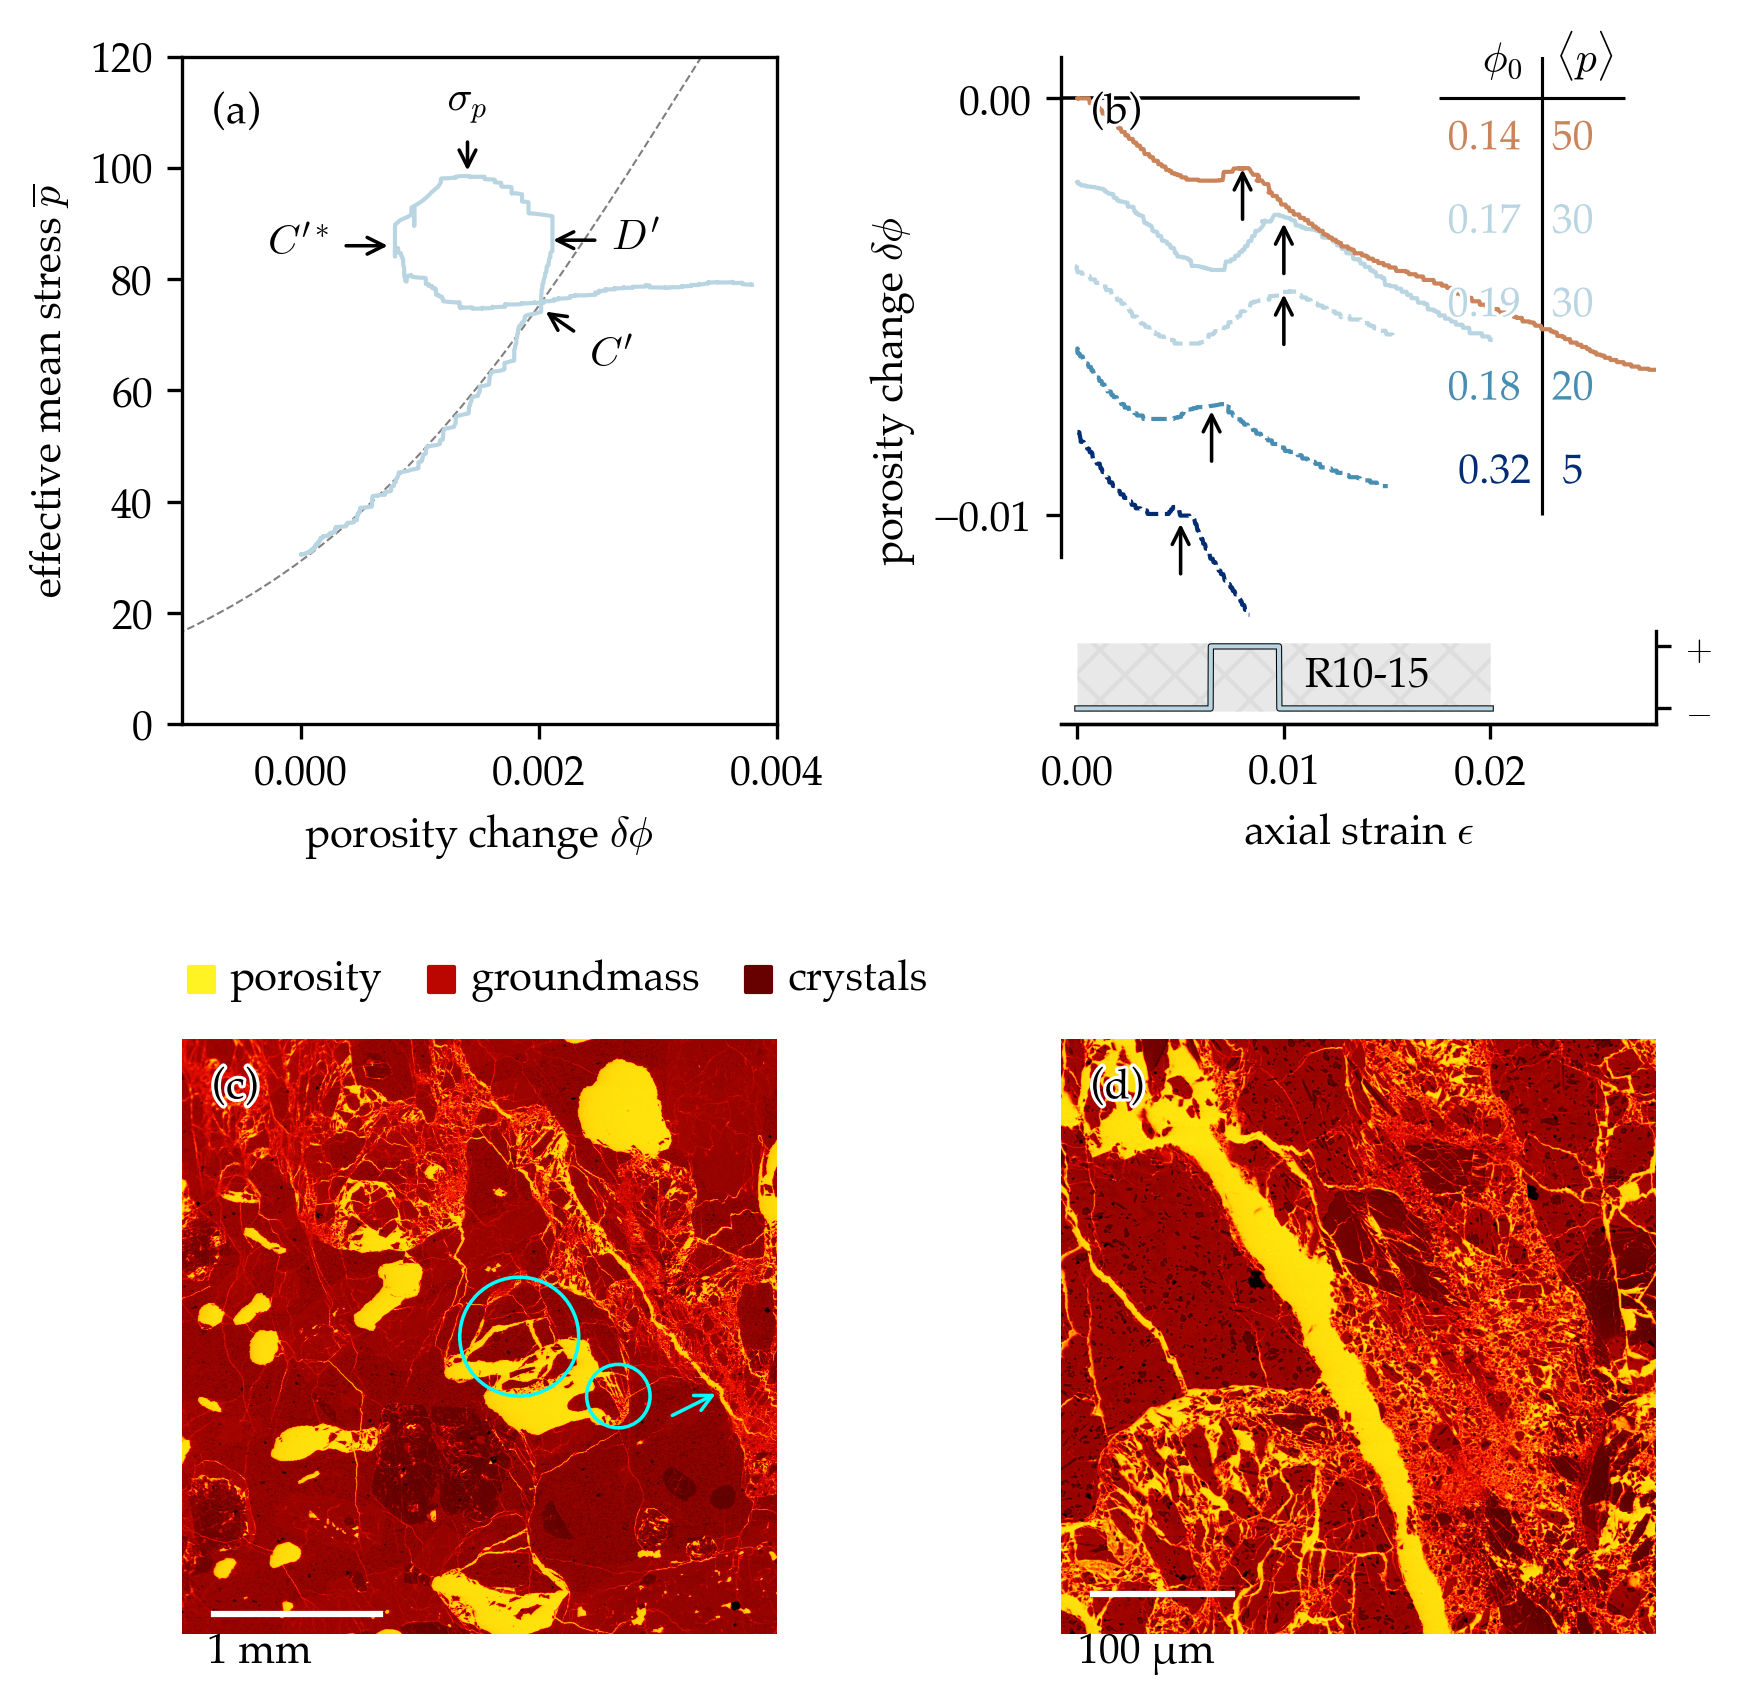

In [38]:
### RS Fig 4 ###
fig = plt.figure(1, figsize = (mm2inch(150,150)), dpi = 300)
### Define a hypothetical hydrostat
x = np.arange(-4, 4.1, 0.1)
y = logistic(x)

phi_i = [.199043260580447, 0.14, 0.22, 0.155]
axs = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224),
       #fig.add_subplot(245), fig.add_subplot(246), fig.add_subplot(247), fig.add_subplot(248),
      ]

colors = [vik_map(x2clr(10,70)), "grey"]

sample = "R10-15"

df = data_dict[sample][0]
# axs[0].plot(df['Defvolfluide'][0:-1130],df["Pm"][0:-1130], 
m = 5608
m2 = 5658
m3 = 1130
axs[0].plot(df['Defvolfluide'][0:m],df["Pm"][0:m], 
             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
             alpha = 1.0, zorder = -i, label = data_dict[sample][1])
axs[0].plot(df['Defvolfluide'][m2:-m3],df["Pm"][m2:-m3], 
             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
             alpha = 1.0, zorder = -i, label = data_dict[sample][1])
axs[0].set_ylim(0,140)

axs[0].set_ylabel(r"effective mean stress $\overline{p}$")
axs[0].set_xlabel(r"porosity change $\delta\phi$")


#     ### Plot a theoretical hydrostat curve
# axs[0].plot(normalize(x, (min(x), max(x)),(-0.0127+0.008, 0.0021+0.007)),
#      normalize(y, (min(y), max(y)),(2,230)), 
#             zorder = -5, color="k", alpha = 0.5,lw=0.5, ls="--")

    ### Plot a theoretical hydrostat curve
axs[0].plot(normalize(x, (min(x), max(x)),(-0.0127+0.009, 0.0021+0.0081)),
     normalize(y, (min(y), max(y)),(2,230)), 
            zorder = -10, color="k", alpha = 0.5,lw=0.5, ls="--")


axs[0].annotate(r"$C^\prime$", xy = (0.002, 75), xycoords = "data", 
                  xytext=(12, -12), textcoords="offset points",
                va="center",
                 arrowprops=dict(arrowstyle="->", lw=0.85))

axs[0].annotate(r"$D^\prime$", xy = (0.00205, 87), xycoords = "data", 
                  xytext=(16, 0), textcoords="offset points",
                va="center",
                 arrowprops=dict(arrowstyle="->", lw=0.85))

axs[0].annotate(r"$\sigma_p$", xy = (0.0014, 98), xycoords = "data", 
                  xytext=(0, 18), textcoords="offset points",
                va="center", ha="center",
                path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
                 arrowprops=dict(arrowstyle="->", lw=0.85))

axs[0].annotate(r"$C^{\prime*}$", xy = (0.0008, 86), xycoords = "data", 
                  xytext=(-16, 0), textcoords="offset points",
                va="center", ha="right",
                 arrowprops=dict(arrowstyle="->", lw=0.85))
axs[0].set_ylim(0,120)
axs[0].set_xlim(-0.001,.004)

# ax_7a = fig.add_axes([0.895,0.33,0.065,0.13])
# ax_7a = fig.add_axes([0.85,0.85,0.1,0.1])
# for sample in ['R10-4', 'R10-5', 'R10-6', 'R10-9', 'R10-12', "R10-15"]:#subset_50:#["R10-3"]:
for k, sample in enumerate(['R10-15', "R10-5"]):#subset_50:#["R10-3"]:

    df = data_dict[sample][0]

    axs[1].plot(df['Defaxcapt'],-df["Defvolfluide"]-[0.002,0][k],
#                 marker = "None", ms=.5, 
                color = vik_map(x2clr(int(data_dict[sample][1]), 70)),
                lw=1
               )


ax_7b = axs[1].twinx()

# for msh in [msh_2_7, msh_1_1, msh_2_5]:#subset_50:#["R10-3"]:

#     df = msh
axs[1].plot(msh_1_1['Defaxcapt'][0:-600],-msh_1_1["Defvolfluide"][0:-600]-0.008,
#                 marker = "None", ms=.5, 
            ls="--",
                color = vik_map(x2clr(5, 70)),
                lw=1, zorder = 10
               )
axs[1].plot(msh_2_5['Defaxcapt'],-msh_2_5["Defvolfluide"]-0.006,
#                 marker = "None", ms=.5, 
            ls="--",
                color = vik_map(x2clr(20, 70)),
                lw=1, zorder = 9
               )
axs[1].plot(msh_2_7['Defaxcapt'],-msh_2_7["Defvolfluide"]-0.004,
#                 marker = "None", ms=.5, 
            ls="--",
                color = vik_map(x2clr(30, 70)),
                lw=1, zorder = 8
               )

axs[1].set_xlim(0,0.02)
axs[1].set_ylim(-0.015, 0.001)
# ax_7a.set_ylim(-0.015+0.005, 0.001+0.005)


axs[1].spines["top"].set_bounds(-0.01,0.1)
axs[1].spines["left"].set_bounds(-0.011, 0.001)
axs[1].spines["right"].set_visible(False)

axs[1].set_yticks([-0.01,0])
# ax_7a.set_yticks([-0.005,0])

plot_sign_line(sample="R10-15", axis=ax_7b, smoothing = 53)
ax_7b.set_ylim(-1.5, 20)
ax_7b.spines["right"].set_visible(True)
ax_7b.spines["left"].set_visible(False)
ax_7b.spines["top"].set_visible(False)
ax_7b.spines["right"].set_bounds(-1.5, 1.5)


# for key, item in literature_dict.items():
#     ax_7a.scatter(item[1][0], item[0], fc=item[2], ec="k", s=9, linewidths=0.5,)
#     try:
#         ax_7a.scatter(item[1][1], item[0], fc=item[2], ec="k", s =9, linewidths=0.5,
#                    )
#     except:
#         continue
# #     plt.scatter(item[0], item[1[0]])

# # ax_7a.set_xlabel(r"$\langle p\rangle$ (MPa)", labelpad=-1.5)
# ax_7a.set_xlabel(r"$\langle p\rangle$", labelpad=-2)
# ax_7a.set_ylabel(r"$\phi_0$", labelpad=-1)
# ax_7a.set_ylim(0.1,0.35)
# ax_7a.set_xlim(0,60)
# ax_7a.set_xticks([0,60])
# # ax_7a.set_xticklabels(["0","60 MPa"])
# ax_7a.set_yticks([.1,.3])
axs[1].spines["top"].set_visible(False)
axs[1].axhline(0, 0, 0.5, color="k", lw=0.85, zorder=-99)
axs[1].set_xlim(-0.0008, 0.028)
# axs[1].annotate("", xy = (0.008, -0.001), xycoords = "data", 

# ax_7a.xaxis.set_label_position('top')
# ax_7a.xaxis.set_ticks_position('top')
# # ax_3b.spines["bottom"].set_visible(False)
# ax_7a.yaxis.set_label_position('right')
# ax_7a.yaxis.set_ticks_position('right')
# ax_3b.spines["left"].set_visible(False)
# ax1.spines["right"].set_visible(False)
# axs[3].spines["top"].set_bounds(-0.01,0.1)
# axs[3].spines["left"].set_bounds(-0.06,0.02)
for coords in [(0.005, -0.01), (0.0065, -0.0073), (0.01, -0.0045), (0.01, -0.0028), (0.008, -0.0015)]:
    axs[1].annotate(r"", xy = coords, xycoords = "data", 
                      xytext=(0, -16), textcoords="offset points",
                    va="center", ha="center",
    #                 path_effects=,
                     arrowprops=dict(arrowstyle="->", lw=0.85))
    
# axs[7].annotate("R", xy = (0.01,-0.001), xycoords="data",va="center", ha="center", path_effects = buffer)
# axs[7].annotate("R", xy = (0.015,-0.005), xycoords="data",va="center", ha="center", path_effects = buffer)
# axs[1].annotate("MSH", xy = (0.014,-0.006), xycoords="data",va="center", ha="left", path_effects = buffer, zorder=20)
# axs[1].annotate("MSH", xy = (0.014,-0.0095), xycoords="data",va="center", ha="left", path_effects = buffer, zorder=20)
# axs[1].annotate("MSH", xy = (0.009,-0.012), xycoords="data",va="center", ha="left", path_effects = buffer, zorder=20)
# axs[4].set_yticks([0,50,100])

# for ix, ax in enumerate(axs):
#     ax.annotate(["a", "b", "c", "d", "e", "f", "g", "h"][ix],
#                 xy=(0.05, 0.9), xycoords="axes fraction", path_effects=buffer)
    
axs[1].set_ylabel(r"porosity change $\delta\phi$")
axs[1].set_xlabel(r"axial strain $\epsilon$")

axs[2].annotate(r"1 mm", xy = (0,0), xycoords = "axes fraction",
                xytext = (6,-7), textcoords = "offset points")
axs[3].annotate(r"100 μm", xy = (0,0), xycoords = "axes fraction",
                xytext = (4,-7), textcoords = "offset points")
ax_7b.annotate("R10-15", xy = (0.011, 0), xycoords = "data", va="center")

#########

legend_kwargs = {"fancybox": False, "frameon": False,"ncol":3, "handletextpad":0.3,
                "handlelength":0.8, "columnspacing": 1, }

axs[2].scatter([],[],marker="s", color = fire[240], label = "porosity")
axs[2].scatter([],[],marker="s", color = fire[100], label = "groundmass")
axs[2].scatter([],[],marker="s", color = fire[50], label = "crystals")
axs[2].legend(**legend_kwargs, loc = 3,bbox_to_anchor=(-0.06, 1))
# plt.savefig("GRL-Fig-2.svg", bbox_inches="tight")




for ix, ax in enumerate(axs):
    ax.annotate("({})".format(["a", "b", "c", "d"][ix]),
#                 color = ["k", "k", "w","k"][ix],
                xy=(0.05, 0.9), xycoords="axes fraction",path_effects=buffer)

plot_microstructure(axis=axs[2], filename="R10-15-04", scale=1000, crop = [0,0,1500,1500])
plot_microstructure(axis=axs[3], filename="R10-15-13", scale=100, crop = [0,0,1500,1500])


axs[1].annotate(r"$\phi_0$   $\langle p\rangle$", xy = (0.026,0.001),
                xycoords="data",va="center", ha="right", path_effects = buffer,  
                 )

axs[1].annotate(r"0.14   50", xy = (0.025,-0.001),
                xycoords="data",va="center", ha="right", path_effects = buffer,  
                color = vik_map(x2clr(50, 70)), )
# axs[1].annotate(r"$\phi_0 = 0.17$, $\langle p\rangle$ = 30", xy = (0.022,-0.005),
#                 xycoords="data",va="center", ha="center", path_effects = buffer)
axs[1].annotate(r"0.17   30", xy = (0.025,-0.003),
                xycoords="data",va="center", ha="right", path_effects = buffer,  
                color = vik_map(x2clr(30, 70)), )
# axs[1].annotate(r"$\phi_0 = 0.19$, $\langle p\rangle$ = 30", xy = (0.021,-0.007),
#                 xycoords="data",va="center", ha="center", path_effects = buffer)
# axs[1].annotate(r"$\phi_0 = 0.18$, $\langle p\rangle$ = 20", xy = (0.02,-0.01),
#                 xycoords="data",va="center", ha="center", path_effects = buffer)
# axs[1].annotate(r"$\phi_0 = 0.32$, $\langle p\rangle$ = 5", xy = (0.017,-0.0122),
#                 xycoords="data",va="center", ha="center", path_effects = buffer)
axs[1].annotate(r"0.19   30", xy = (0.025,-0.005),
                xycoords="data",va="center", ha="right", path_effects = buffer,  
                color = vik_map(x2clr(30, 70)), )
axs[1].annotate(r"0.18   20", xy = (0.025,-0.007),
                xycoords="data",va="center", ha="right", path_effects = buffer,  
                color = vik_map(x2clr(20, 70)), )
axs[1].annotate(r"0.32   5 ", xy = (0.025,-0.009),
                xycoords="data",va="center", ha="right", path_effects = buffer,  
                color = vik_map(x2clr(5, 70)), )

axs[1].hlines(y = 0, xmin = 0.0175,xmax = 0.0265, lw=0.75)
axs[1].vlines(x = 0.0225, ymin = -0.01, ymax = 0.01, lw=0.75)
# axs[1].hlines(y = 0, xmin = -0.01,xmax = 0, )
# axs[7].annotate("R", xy = (0.015,-0.005), xycoords="data",va="center", ha="center", path_effects = buffer)



axs[2].annotate(r"", xy = (0.91, 0.41), xycoords = "axes fraction", 
                  xytext=(-14, -7), textcoords="offset points",
                  path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
                 arrowprops=dict(arrowstyle="->", lw=0.85, color="cyan"), va="center")

# axs[3].annotate(r"", xy = (0.5, 0.56), xycoords = "axes fraction", 
#                   xytext=(14, -7), textcoords="offset points",
#                   path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
#                  arrowprops=dict(arrowstyle="->", lw=0.85, color="cyan"), va="center")

# axs[3].annotate(r"", xy = (0.28, 0.87), xycoords = "axes fraction", 
#                   xytext=(-14, 0), textcoords="offset points",
#                   path_effects=[pe.withStroke(linewidth=1.5, foreground="w")],
#                  arrowprops=dict(arrowstyle="->", lw=0.85, color="cyan"), va="center")


circ = patches.Circle((850,750), 150, linewidth=0.85, edgecolor='cyan'
                         , facecolor="none", zorder = np.inf
                     )
axs[2].add_patch(circ)
circ2 = patches.Circle((1100,900), 80, linewidth=0.85, edgecolor='cyan'
                         , facecolor="none", zorder = np.inf
                     )
axs[2].add_patch(circ2)

# rect = patches.Rectangle((80,500), 1450, 1450, linewidth=0.65, edgecolor='cyan'
#                          , facecolor="none", zorder = np.inf)

# # [80,500],[1450, 1450]
# axs[2].add_patch(rect)

plt.tight_layout()
# plt.show()

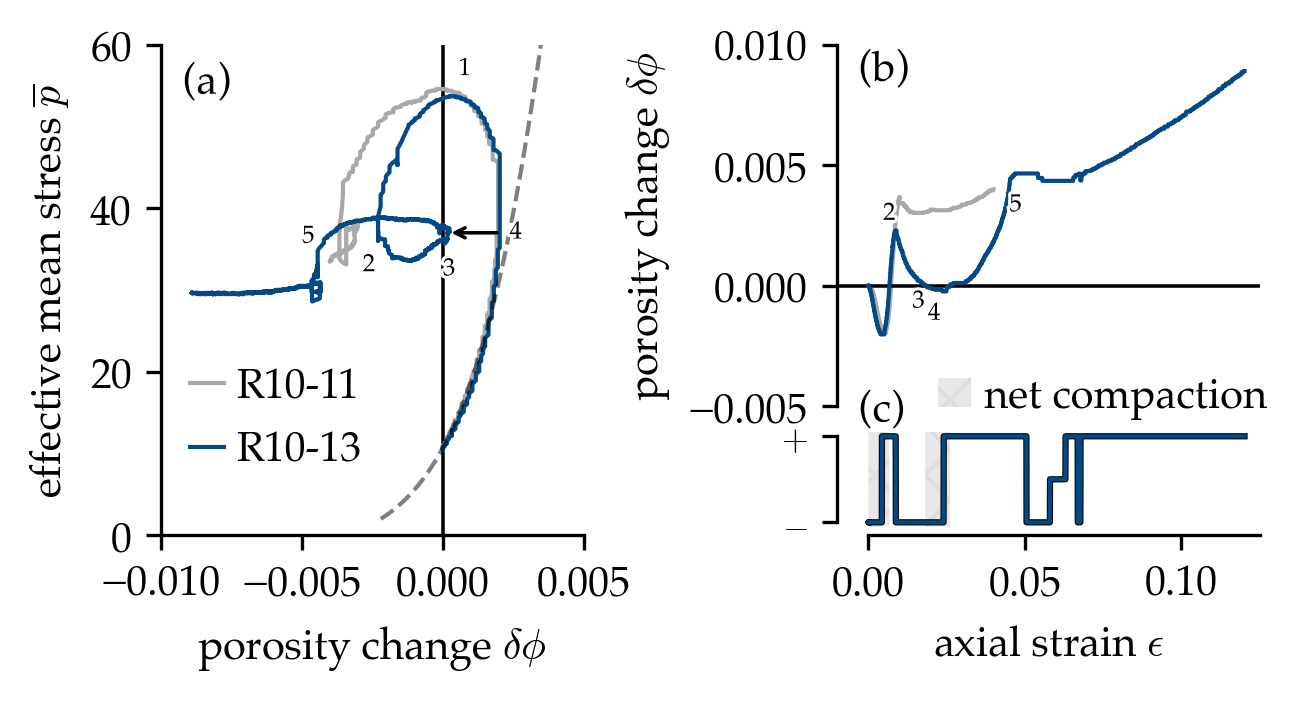

In [39]:
### RS Fig 5
buffer = [pe.withStroke(linewidth=1.5, foreground="w")]
fig = plt.figure(1, figsize = (mm2inch(120,55)), dpi = 300)

# ax1  = plt.subplot2grid((4, 2), (0, 0), rowspan=4)
# ax2  = plt.subplot2grid((4, 2), (0, 1), rowspan=3)
# ax3  = plt.subplot2grid((4, 2), (3, 1), rowspan=1)
# AXS = [ax1, ax2, ax3]

AXS = gridspec.GridSpec(4,2)
ax1  = plt.subplot(AXS[0:4,0])
ax2  = plt.subplot(AXS[0:3,1])
ax3  = plt.subplot(AXS[3:4,1])



#### panel a ####
df = data_dict["R10-11"][0]
ax1.plot(df['Defvolfluide']+x_offsets[0],df["Pm"] ,

             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = "darkgrey",
            alpha = 1.0, zorder = -10, label = "R10-11")
ax2.plot(df['Defaxcapt'],-1*df["Defvolfluide"], 

             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = "darkgrey",
            alpha = 1.0, zorder = -10, label = "R10-11")

df = data_dict["R10-13"][0]
ax1.plot(df['Defvolfluide']+x_offsets[0],df["Pm"] ,

             "-",ms=1,lw=1,mew=.5,mfc="None",
               color = vik_map(x2clr(int(data_dict["R10-13"][1]), 70)),
            alpha = 1.0, zorder = -10, label = "R10-13")
ax2.plot(df['Defaxcapt'],-1*df["Defvolfluide"], 
             "-",ms=1,lw=1,mew=.5,mfc="None",
                color = vik_map(x2clr(int(data_dict["R10-13"][1]), 70)),
             alpha = 1.0, zorder = -i, label = "R10-13")

    ### Plot a theoretical hydrostat curve
ax1.plot(normalize(x, (min(x), max(x)),(-0.0127+0.0105, 0.0021+0.011)),
     normalize(y, (min(y), max(y)),(2,230)), 
            zorder = -5, color="k", alpha = 0.5,lw=1, ls="--")
ax1.set_ylim(0,60)
ax1.set_xlim(-0.01, 0.005)

ax2.set_xlim(-0.01,0.125)
ax2.set_ylim(-0.005,0.01)
ax3.set_xlim(-0.01,0.125)
ax2.set_xticks([])
ax2.axhline(color="k", lw=0.85, zorder=-10)
ax2.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax1.set_ylabel(r"effective mean stress $\overline{p}$")
ax1.set_xlabel(r"porosity change $\delta\phi$")
ax2.set_ylabel(r"porosity change $\delta\phi$")
ax3.set_xlabel(r"axial strain $\epsilon$")
plot_sign_line(sample="R10-13", axis=ax3, smoothing = 53)
# plt.tight_layout()
legend_kwargs["ncol"] =1
AXS.update(wspace = 0.6, hspace = 0.25)
ax1.legend(**legend_kwargs, loc = 3,bbox_to_anchor=(-0.02, 0.05))
ax3.legend(**legend_kwargs, loc = 2,bbox_to_anchor=(0.15, 1.9))
ax1.annotate(r"4", xy = (0, 37), xycoords = "data",  #$C^{\prime*}$
                  xytext=(19, 0), textcoords="offset points",
                va="center", ha="right",path_effects=buffer, fontsize=6,
                 arrowprops=dict(arrowstyle="->",shrinkB=2,shrinkA=1, lw=0.85))
ax1.axvline(color="k", zorder=-99, lw=0.85)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
for ix, ax in enumerate([ax1, ax2, ax3]):
    ax.annotate("({})".format(["a", "b", "c"][ix]), 
                xy=[(0.05, 0.9), (0.05, 0.9),(0.05, 1.1)][ix], xycoords="axes fraction", path_effects=buffer)
# ax1.annotate()


ax1.annotate(r"1", xy = (0.001, 57), xycoords = "data",  #$C^{\prime*}$
                  xytext=(0, 0), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )
ax1.annotate(r"2", xy = (-0.0024, 33), xycoords = "data",  #$C^{\prime*}$
                  xytext=(0, 0), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )
ax1.annotate(r"3", xy = (0, 33), xycoords = "data",  #$C^{\prime*}$
                  xytext=(3, -1), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )
ax1.annotate(r"5", xy = (-0.005, 37), xycoords = "data",  #$C^{\prime*}$
                  xytext=(3, -1), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )

# ax2.annotate(r"1", xy = (0.0005, 0.001), xycoords = "data",  #$C^{\prime*}$
#                   xytext=(0, 0), textcoords="offset points",
#                 va="center", ha="right",path_effects=buffer,fontsize=6
# #                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
#             )
ax2.annotate(r"2", xy = (0.01,0.0028), xycoords = "data",  #$C^{\prime*}$
                  xytext=(-1, 1), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )
ax2.annotate(r"3", xy = (0.014,-0.0005), xycoords = "data",  #$C^{\prime*}$
                  xytext=(3, -1), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )
ax2.annotate(r"4", xy = (0.019,-0.001), xycoords = "data",  #$C^{\prime*}$
                  xytext=(3, -1), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )
ax2.annotate(r"5", xy = (0.045, 0.0035), xycoords = "data",  #$C^{\prime*}$
                  xytext=(3, -1), textcoords="offset points",
                va="center", ha="right",path_effects=buffer,fontsize=6
#                  arrowprops=dict(arrowstyle="->",shrinkB=2, lw=0.85)
            )
# legend_kwargs = {"fancybox": False, "frameon": False,"ncol":2, "handletextpad":0.3,
#                 "handlelength":0.8, "columnspacing": 1, }#"fontsize":8}
# axs[0].legend(**legend_kwargs, loc=2, bbox_to_anchor=(0.4, 0.38), labelspacing=0.2)

# axs[3].legend(**legend_kwargs, loc=2,bbox_to_anchor=(0.3, 1.2), markerscale = 0.8, labelspacing=0.2,fontsize=6)
# ax1.axvline(-0.00235, lw=0.5, zorder=-999)
# ax2.axhline(0.00235, lw=0.5, zorder=-999)
# ax2.axvline(0.0085, lw=0.5, zorder=-999)
ax3.spines["bottom"].set_bounds(0,0.125)

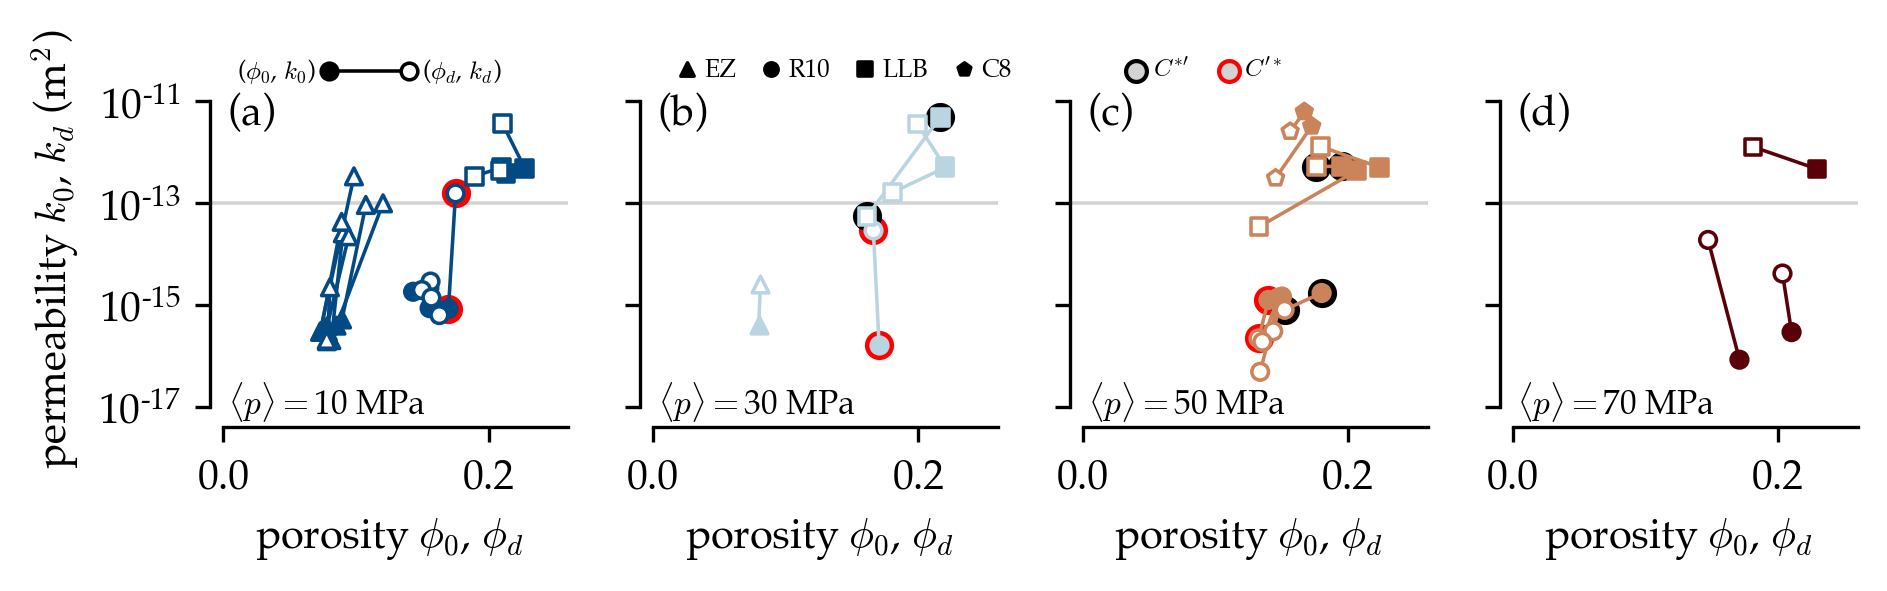

In [40]:
# # call_plt_params_serif()
# # mpl.rc('text', usetex=False)
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"
fig = plt.figure(1, figsize= (mm2inch(180,40)), dpi = 300)
axs = [fig.add_subplot(141),
       fig.add_subplot(142),
       fig.add_subplot(143),
       fig.add_subplot(144)]

symbols = ["^", "o", "s", "p",]#["s", "^","o", "D", "p", "v"]
for ix, s in enumerate(["EZ", "R10", "LLB", "C8"]): #KA
# for ix, s in enumerate(["EB", "R10", "LLB", "C8"]):
    for j, k in enumerate([10,30,50,70]):
        ax = axs[j]
        subset=volcanic_data[volcanic_data["Peff"]==k]#.reset_index()
        subset=subset[subset["Sample"].str.contains(s)].reset_index()
        colors = [vik_map(x2clr(subset["Peff"][i], 70)) for i in range(len(subset))]
        subset["colors"] =colors
        
        
        ax.scatter(subset['_'], subset['k0 [m2]'], 
        #             c = subset["Peff"], cmap=vik_map, vmin=0, vmax=70,
                   ec = subset["colors"],
                    c = subset["colors"], marker= symbols[ix],
                    s=16, lw=0.85, zorder=5, label=s)
        ax.scatter(subset['post-deformation porosity'], subset['ke [m2]'],
        #             ec = subset["Peff"], cmap=vik_map, vmin=0, vmax=70,
                    ec = subset["colors"], marker= symbols[ix],
                    fc = "w", s=16, lw=.85, zorder=5)
        ax.set_yscale("log")

        for i in range(len(subset)):
            ax.plot(#subset.loc[i, "_"],subset.loc[i, "k0 [m2]"])

                [subset.loc[i, "_"],subset.loc[i, "post-deformation porosity"]],
                     [subset.loc[i, "k0 [m2]"],subset.loc[i, "ke [m2]"]], c=subset["colors"][i], lw=0.85)
for j, ax in enumerate(axs):
#     print(j)
    if j > 0:
        ax.set_yticklabels([])

# subset=volcanic_data[volcanic_data["Peff"]==k].reset_index()

C_prime_star = ["R10-13", "R10-15", "R10-5"]
subset=volcanic_data[volcanic_data["Sample"].str.contains("R10-13")].reset_index()
axs[0].scatter(subset['_'], subset['k0 [m2]'], 
        #             c = subset["Peff"], cmap=vik_map, vmin=0, vmax=70,
#                    ec = "r",
                    c = "r",)
axs[0].scatter(subset['post-deformation porosity'], subset['ke [m2]'],color="r")

subset=volcanic_data[volcanic_data["Sample"].str.contains("R10-5")].reset_index()
axs[2].scatter(subset['_'], subset['k0 [m2]'], 
        #             c = subset["Peff"], cmap=vik_map, vmin=0, vmax=70,
#                    ec = "r",
                    c = "r",)
axs[2].scatter(subset['post-deformation porosity'], subset['ke [m2]'],color="r")

subset=volcanic_data[volcanic_data["Sample"].str.contains("R10-15")].reset_index()
axs[1].scatter(subset['_'], subset['k0 [m2]'], 
        #             c = subset["Peff"], cmap=vik_map, vmin=0, vmax=70,
#                    ec = "r",
                    c = "r",)
axs[1].scatter(subset['post-deformation porosity'], subset['ke [m2]'],color="r")


# subset=volcanic_data[volcanic_data["Sample"].str.contains("R10-11")].reset_index()
# axs[2].scatter(subset['_'], subset['k0 [m2]'], 
#         #             c = subset["Peff"], cmap=vik_map, vmin=0, vmax=70,
#                    ec = "r",
#                     c = "r",)
# axs[2].scatter(subset['post-deformation porosity'], subset['ke [m2]'],color="r")

### C*'
subset=volcanic_data[volcanic_data["Sample"].str.contains("LLB-13")].reset_index()
axs[1].scatter(subset['_'], subset['k0 [m2]'], 
                   ec = "k",
                    c = "k",)
axs[1].scatter(subset['post-deformation porosity'], subset['ke [m2]'],color="k")
subset=volcanic_data[volcanic_data["Sample"].str.contains("LLB-3")].reset_index()
axs[2].scatter(subset['_'], subset['k0 [m2]'], 
                   ec = "k",
                    c = "k",)
axs[2].scatter(subset['post-deformation porosity'], subset['ke [m2]'],color="k")

subset=volcanic_data[volcanic_data["Sample"].str.contains("R10-12")].reset_index()
axs[2].scatter(subset['_'], subset['k0 [m2]'], 
                   ec = "k",
                    c = "k", label = r"$C^*\prime$")
axs[2].scatter(subset['post-deformation porosity'], subset['ke [m2]'],color="k")


axs[0].plot([0.08, 0.14],[4e-11, 4e-11], color = "k", clip_on=False, lw=.85)
axs[0].scatter(0.08, 4e-11, color= "k", marker="o",s=16, lw=0.85, clip_on=False) 
axs[0].scatter(0.14, 4e-11, fc = "w", marker="o",s=16, lw=0.85, ec="k", zorder=10, clip_on=False) 

axs[0].annotate(r"($\phi_0$, $k_0$)", xy = (0.07, 4e-11), xycoords = "data", fontsize = 6,
              ha="right"  , va="center"
               )
axs[0].annotate(r"($\phi_d$, $k_d$)", xy = (0.15, 4e-11), xycoords = "data", fontsize = 6,
              ha="left"  , va="center"
               )

for ii, axis in enumerate(axs):
    axis.spines["top"].set_visible(False);axis.spines["right"].set_visible(False)
    axis.axhline(1e-13, color="lightgrey", lw=0.85, zorder=0)
    axis.set_xlabel(r"porosity $\phi_0$, $\phi_d$")
    axis.set_xlim(-0.01,0.26)
    axis.spines["bottom"].set_bounds(0,0.26)
    axis.spines["left"].set_bounds(1e-17,1e-11)
    axis.set_yticks([1e-17,1e-15,1e-13,1e-11])
    axis.set_ylim(4e-18, 4e-11)
    axis.annotate(r"$\langle p\rangle = ${} MPa".format([10,30,50,70][ii]),
                  xy = (0.05,0.04), xycoords="axes fraction", fontsize=8)
axs[0].set_ylabel(r"permeability $k_0$, $k_d$ (m$^2$)")



legend_kwargs = {"fancybox": False, "frameon": False,"ncol":4, "handletextpad":0.3,
                "handlelength":0.8, "columnspacing": 1, "fontsize":6}#"fontsize":8}
# axs[0].legend(**legend_kwargs, loc=2, bbox_to_anchor=(0.4, 0.38), labelspacing=0.2)

# axs[3].legend(**legend_kwargs, loc=2,bbox_to_anchor=(0.3, 1.2), markerscale = 0.8, labelspacing=0.2,fontsize=6)
# axs[0].legend(**legend_kwargs, bbox_to_anchor=(0.7, 0.5), markerscale = 0.8)
axs[1].legend(**legend_kwargs, bbox_to_anchor=(1.1, 1.1), markerscale = 0.8)
leg = axs[1].get_legend()
for l in leg.legendHandles:
    l.set_color("k")
    
axs[2].scatter(0.04, 4e-11, edgecolor= "k",
               facecolor = "lightgrey", marker="o",s=25, lw=1, clip_on=False) 
axs[2].scatter(0.11, 4e-11, edgecolor= "r",
               facecolor = "lightgrey", marker="o",s=25, lw=1, clip_on=False) 
axs[2].annotate(r"$C^{*\prime}$", xy = (0.08, 4e-11), xycoords = "data", fontsize = 6,
              ha="right"  , va="center"
               )
axs[2].annotate(r"$C^{\prime*}$", xy = (0.15, 4e-11), xycoords = "data", fontsize = 6,
              ha="right"  , va="center"
               )

for ix, ax in enumerate(axs):
    ax.annotate(["(a)", "(b)", "(c)", "(d)"][ix], xy=(0.05, 0.85), xycoords="axes fraction")
#     ax.spines["right"].set_visible(False)
# axs[2].legend(**legend_kwargs)

# axs[0].yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=999))
# axs[0].yaxis.set_minor_locator(mpl.ticker.LogLocator(numticks=999, subs="auto"))
plt.show()

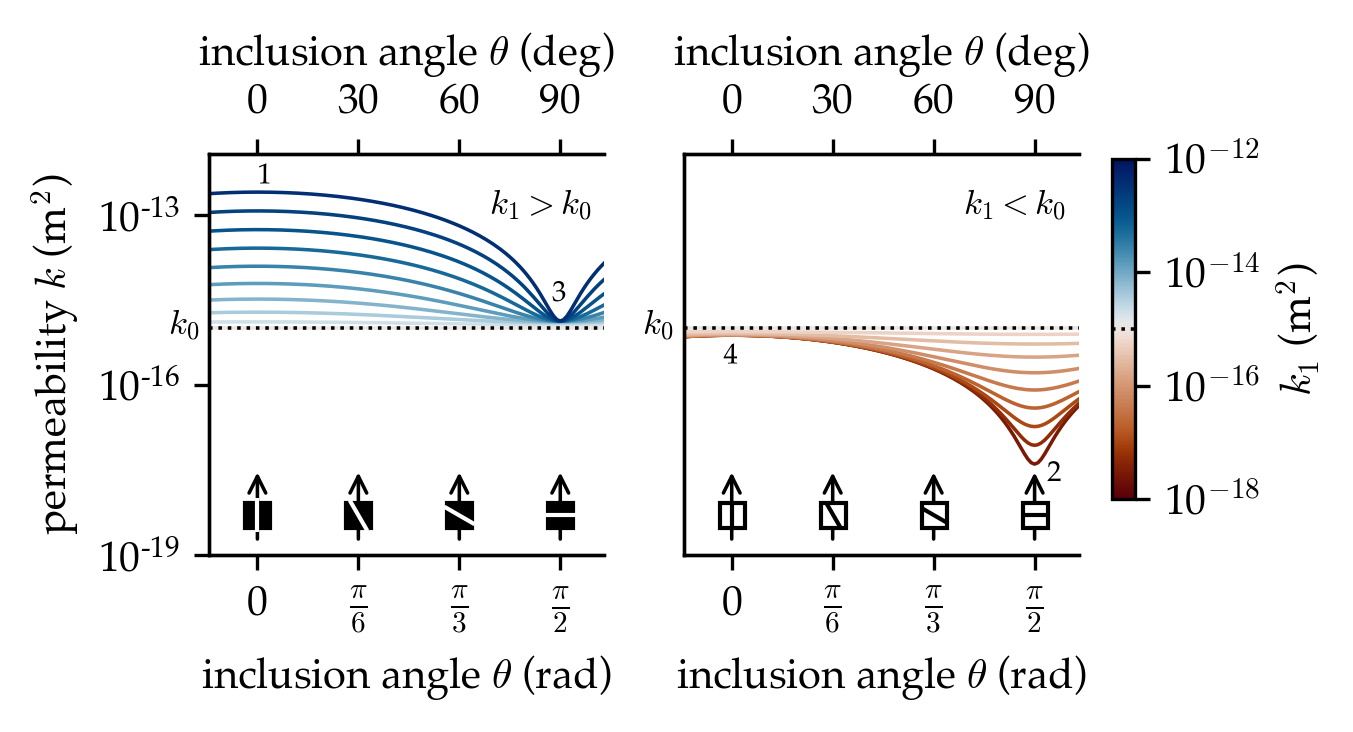

In [41]:
# k1 = 1e-12
k0 = 1e-15

ws = [5,15]
L = 40
thetas = np.arange(-60,121,1)
rads = [math.radians(x) for x in thetas]

# cm = plt.cm.seismic(np.linspace(-3, 3, 7))
# cm = LinearSegmentedColormap.from_list("vik", 7)

fig = plt.figure(1, figsize = (mm2inch(95, 45)), dpi = 300)
ax0=fig.add_subplot(121)
# ax0.set_prop_cycle('color', list(cm))
# for k1 in np.geomspace(1e-18, 1e-15, 10):
for k1 in np.geomspace(1e-15, 1e-12, 10):
# [1e-12, 5e-12,1e-13,5e-13,1e-14,5e-14,1e-15,1e-16, 1e-17,1e-18]:
    ks = [k1,k0]
    step1 = []
    step2 = []
    for i, w in enumerate(ws):
        step1.append(w/ks[i])
        step2.append(w*ks[i])
    kz = sum(ws)/sum(step1)
    kx = sum(step2)/sum(ws)
    # print("k1 = {:.2e}; k0 = {:.2e}; kx = {:.2e}; kz = {:.2e}".format(k1, k0, kx, kz))

    ke_thetas = []
    for theta in rads:
        ke_theta = (kz*(math.sin(theta))**2) + (kx*(math.cos(theta))**2)
        ke_thetas.append(ke_theta)
    ax0.plot(rads, ke_thetas, lw=0.85, 
             color = vik_map(x2clr(math.log10(1e-15/k1), 7)+128),
             ls="-")

ax0.set_yscale("log")
ax0.set_ylim(0.8e-18, 1.2e-12)
ax0.axhline(1e-15, color="k", lw=0.85, ls=":", zorder = np.inf)
ax0.set_xticks([0, math.pi/6, math.pi/3, math.pi/2])
ax0.set_xticklabels([r"0", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$", r"$\frac{\pi}{2}$"])
# ax0.set_xlim(-0.1,1.8)
ax1 = ax0.twiny()
# ax1.set_xlim(-0.1,1.8)

ax1.set_xticks([0, math.pi/6, math.pi/3, math.pi/2])
ax1.set_xticklabels([int(np.ceil(math.degrees(x))) for x in [0, math.pi/6, math.pi/3, math.pi/2]])
ax0.spines["right"].set_visible(False)
ax1.spines["right"].set_visible(False)


ax2=fig.add_subplot(122)


for k1 in np.geomspace(1e-18, 1e-15, 10):
# [1e-12, 5e-12,1e-13,5e-13,1e-14,5e-14,1e-15,1e-16, 1e-17,1e-18]:
    ks = [k1,k0]
    step1 = []
    step2 = []
    for i, w in enumerate(ws):
        step1.append(w/ks[i])
        step2.append(w*ks[i])
    kz = sum(ws)/sum(step1)
    kx = sum(step2)/sum(ws)
    # print("k1 = {:.2e}; k0 = {:.2e}; kx = {:.2e}; kz = {:.2e}".format(k1, k0, kx, kz))

    ke_thetas = []
    for theta in rads:
        ke_theta = (kz*(math.sin(theta))**2) + (kx*(math.cos(theta))**2)
        ke_thetas.append(ke_theta)
    ax2.plot(rads, ke_thetas, lw=0.85, 
             color = vik_map(x2clr(math.log10(1e-15/k1), 7)+128),
             ls="-")

ax2.set_yscale("log")

ax2.axhline(1e-15, color="k", lw=0.85, ls=":", zorder = np.inf)
ax2.set_xticks([0, math.pi/6, math.pi/3, math.pi/2])
ax2.set_xticklabels([r"0", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$", r"$\frac{\pi}{2}$"])
# ax2.set_xlim(-0.1,1.8)
ax3 = ax2.twiny()


ax3.set_xticks([0, math.pi/6, math.pi/3, math.pi/2])
ax3.set_xticklabels([int(np.ceil(math.degrees(x))) for x in [0, math.pi/6, math.pi/3, math.pi/2]])
ax2.spines["right"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax2.set_yticks([])
for ax in [ax0,ax2]:
#     for sp in ["top", "right"]:
#         ax.spines[sp].set_visible(False)
#     ax.set_ylim(0.8e-18, 1.2e-12)
    ax.set_xlabel(r"inclusion angle $\theta$ (rad)")
    
for ax in [ax1,ax3]:
    ax.set_ylim(1e-19, 1.2e-12)
#     for sp in ["top", "right"]:
#         ax.spines[sp].set_visible(False)
#     ax.set_ylim(0.8e-18, 1.2e-12)
    ax.set_xlabel(r"inclusion angle $\theta$ (deg)")
ax0.set_ylabel("permeability $k$ (m$^2$)")

for x in ([0, math.pi/6, math.pi/3, math.pi/2]):
#     ax1.axvline(x, lw=0.5, color="grey", alpha=0.2, zorder = -10)
    ax3.plot(x,5e-19, "s", color= "w", lw=0.5, mec="k")
    t = mpl.markers.MarkerStyle(marker="|")
    t._transform = t.get_transform().rotate_deg(math.degrees(x))
#     plt.scatter((a1), (a2), marker=t, s=100)
#     ax1.plot(x,1e-17, marker ="o", color= "k", edgecolors="k")
#     ax1.plot(x, 5e-17, marker="^", lw=0., color="k")
    ax1.annotate("",
                xy=(x, 4e-18), xytext = (0,-20), textcoords = "offset points",
                arrowprops=dict(arrowstyle="->", lw=0.85, color="k"), ha="center", zorder=0)
    ax3.scatter(x,5e-19,marker=t, s=40, zorder = np.inf, color = "k", lw=1)

#     ax3.axvline(x, lw=0.5, color="grey", alpha=0.2, zorder = -10)
    ax1.plot(x,5e-19, "s", color= "k")

    ax3.annotate("",
                xy=(x, 4e-18), xytext = (0,-20), textcoords = "offset points",
                arrowprops=dict(arrowstyle="->", lw=0.85), ha="center", zorder=0
                )
    ax1.scatter(x,5e-19,marker=t, s=70, zorder = np.inf, color = "w", lw=1)

for ax in [ax0,ax1,ax2,ax3]:
    ax.set_xlim(-0.25,1.8)
ax0.annotate(r"$k_1 > k_0$", xy = (1.2, 1e-13), fontsize="small")
ax2.annotate(r"$k_1 < k_0$", xy = (1.2, 1e-13), fontsize="small")
# ax3=ax2.twinx()
# ax3.axis("off")
ax3=fig.add_axes([0,0,1,1])
ax3.axis("off")

# cax = fig.add_axes([0.93, 0.12, 0.02, 0.76]) #aligned with spines
cax = fig.add_axes([0.93, 0.23,.02, 0.64]) #aligned with data

# # data = [np.geomspace(np.nan).reshape(1, -1)]
# data = np.array([np.nan]).reshape(1, -1)

# im = ax3.imshow(data, cmap=vik_map_r, vmin=1e-18, vmax=1e-12)
# cb=fig.colorbar(im, cax=cax, orientation='vertical',label='$k_1$ (m$^2$)')
# cb.ax.set_yscale("symlog", linthreshy=1e-1)
# # cb.ax.yaxis.set_minor_locator(MinorSymLogL ocator(1e-20))

data = np.array([np.nan]).reshape(1, -1)

im = ax3.imshow(data, cmap=vik_map, vmin=18, vmax=12)
cb=fig.colorbar(im, cax=cax, orientation='vertical',label='$k_1$ (m$^2$)')
cax.set_ylim(18,12)
cb.ax.axhline(15, color="k", lw=0.85, ls=":", zorder = np.inf)

from matplotlib.ticker import FuncFormatter
def format_tick_labels(x, pos):
    return r'10$^{{-{0:.0f}}}$'.format(x)


cax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax0.annotate("$k_0$", xy=(0,0.55), xycoords = "axes fraction",
             xytext = (-10,0), textcoords="offset points", fontsize="small")
ax2.annotate("$k_0$", xy=(0,0.55), xycoords = "axes fraction",
             xytext = (-10,0), textcoords="offset points", fontsize="small")


ax0.annotate("1", xy=(0,3e-13), xycoords = "data",
             xytext = (0,1), textcoords="offset points", fontsize="x-small", path_effects=buffer)
ax2.annotate("2", xy=(math.pi/2,2e-18), xycoords = "data",
             xytext = (3,0), textcoords="offset points", fontsize="x-small", path_effects=buffer)
ax0.annotate("3", xy=(math.pi/2,3e-15), xycoords = "data",
             xytext = (-2,0), textcoords="offset points", fontsize="x-small", path_effects=buffer)
ax2.annotate("4", xy=(0,2e-16), xycoords = "data",
             xytext = (-2,1), textcoords="offset points", fontsize="x-small", path_effects=buffer)

plt.show()